In [22]:
import pandas as pd
import os
import csv
import requests
#from config import api_key
from pprint import pprint
import matplotlib.pyplot as plt
#General
#url = "https://api.themoviedb.org/3/movie/550?api_key=fe5727baa38b3d7c17df99a30f93fb0e"

#searching for movies that have the Thriller genre
#url="https://api.themoviedb.org/3/discover/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&with_genres=53"
#by country
#url="https://api.themoviedb.org/3/discover/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&certification_country=US&page=1"

#url="https://api.themoviedb.org/3/discover/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&primary_release_year=2017&with_networks=213"

#url="https://api.themoviedb.org/3/discover/tv?api_key=fe5727baa38b3d7c17df99a30f93fb0e&sort_by=primary_release_date.desc&page=1&with_companies=80217121"

#url="https://api.themoviedb.org/3/discover/tv?api_key=fe5727baa38b3d7c17df99a30f93fb0e&with_networks=213"

#url="https://api.themoviedb.org/3/movie/315635?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US"


url="https://api.themoviedb.org/3/genre/movie/list?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&'genres'=0"
responses = []

#for movie in movies:
movie_data = requests.get(url).json()
responses.append(movie_data)
#pprint(responses['results'][0])
#pprint(movie_data['production_companies'][0]['name'])
#for i in range (0,50):
pprint(movie_data)

{'genres': [{'id': 28, 'name': 'Action'},
            {'id': 12, 'name': 'Adventure'},
            {'id': 16, 'name': 'Animation'},
            {'id': 35, 'name': 'Comedy'},
            {'id': 80, 'name': 'Crime'},
            {'id': 99, 'name': 'Documentary'},
            {'id': 18, 'name': 'Drama'},
            {'id': 10751, 'name': 'Family'},
            {'id': 14, 'name': 'Fantasy'},
            {'id': 36, 'name': 'History'},
            {'id': 27, 'name': 'Horror'},
            {'id': 10402, 'name': 'Music'},
            {'id': 9648, 'name': 'Mystery'},
            {'id': 10749, 'name': 'Romance'},
            {'id': 878, 'name': 'Science Fiction'},
            {'id': 10770, 'name': 'TV Movie'},
            {'id': 53, 'name': 'Thriller'},
            {'id': 10752, 'name': 'War'},
            {'id': 37, 'name': 'Western'}]}


In [23]:
pprint(movie_data['genres'][0]['id'])

28


In [24]:
titles=[]
i=0
#input_file= os.path.join("netflix_titles.csv")
df = pd.read_csv('netflix_titles.csv', encoding='utf8')
titles=list(df['title'])
"""
with open(input_file,'r', newline="") as csvfile:
    input_read= csv.reader(csvfile, delimiter=",")
    next(csvfile, None)
    for row in df:
        #titles.append(row[2])
        
        i+=1
        if i== 20:
            break
"""

'\nwith open(input_file,\'r\', newline="") as csvfile:\n    input_read= csv.reader(csvfile, delimiter=",")\n    next(csvfile, None)\n    for row in df:\n        #titles.append(row[2])\n        \n        i+=1\n        if i== 20:\n            break\n'

In [25]:
print(titles)

['Norm of the North: King Sized Adventure', 'Jandino: Whatever it Takes', 'Transformers Prime', 'Transformers: Robots in Disguise', '#realityhigh', 'Apaches', 'Automata', 'Fabrizio Copano: Solo pienso en mi', 'Fire Chasers', 'Good People', 'Joaquín Reyes: Una y no más', 'Kidnapping Mr. Heineken', 'Krish Trish and Baltiboy', 'Krish Trish and Baltiboy: Battle of Wits', 'Krish Trish and Baltiboy: Best Friends Forever', 'Krish Trish and Baltiboy: Comics of India', 'Krish Trish and Baltiboy: Oversmartness Never Pays', 'Krish Trish and Baltiboy: Part II', 'Krish Trish and Baltiboy: The Greatest Trick', 'Love', 'Manhattan Romance', 'Moonwalkers', 'Rolling Papers', 'Stonehearst Asylum', 'The Runner', '6 Years', 'Castle of Stars', 'City of Joy', 'First and Last', 'Laddaland', 'Next Gen', 'Sierra Burgess Is A Loser', 'The Most Assassinated Woman in the World', 'Cézanne et moi', "Archibald's Next Big Thing", 'Article 15', 'Care of Kancharapalem', 'Ee Nagaraniki Emaindi', 'Kill Me If You Dare', 'T

In [26]:
j=0
MID =[]
Budget = []
titles2 = []
Revenue=[]

for i in titles:
    url2=f"https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query={i}&page=1&include_adult=false"
    j+=1
    #if j ==10 : break
    

    try:
        print (i)
        print (url2)
        film_data = requests.get(url2).json()
        #pprint(film_data)
        print (film_data['results'][0]['id'])
        MID.append(film_data['results'][0]['id'])
        print(f"title={film_data['results'][0]['title']}, Movie ID = {film_data['results'][0]['id']}")
        titles2.append(film_data['results'][0]['title'])
        url3=f"https://api.themoviedb.org/3/movie/{MID [j-1]}?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US"
        Budget_data = requests.get(url3).json()
        print(f"Budget for this movie is {Budget_data['budget']},and Revenue for this movie is {Budget_data['revenue']} ")
        Budget.append(Budget_data['budget'])
        Revenue.append(Budget_data['revenue'])

    except:
        print ("NAN")
        Budget.append(0)
        MID.append("NaN")
        Revenue.append("0")
        titles2.append (titles [j])

Norm of the North: King Sized Adventure
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Norm of the North: King Sized Adventure&page=1&include_adult=false
601131
title=Norm of the North: King Sized Adventure, Movie ID = 601131
Budget for this movie is 0,and Revenue for this movie is 1442504 
Jandino: Whatever it Takes
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Jandino: Whatever it Takes&page=1&include_adult=false
415722
title=Jandino: Whatever it Takes, Movie ID = 415722
Budget for this movie is 0,and Revenue for this movie is 0 
Transformers Prime
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Transformers Prime&page=1&include_adult=false
268092
title=Transformers Prime Beast Hunters: Predacons Rising, Movie ID = 268092
Budget for this movie is 0,and Revenue for this movie is 0 
Transformers: Robots in Disguise
ht

478100
title=The Most Assassinated Woman in the World, Movie ID = 478100
Budget for this movie is 0,and Revenue for this movie is 0 
Cézanne et moi
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Cézanne et moi&page=1&include_adult=false
382509
title=Cezanne and I, Movie ID = 382509
Budget for this movie is 0,and Revenue for this movie is 0 
Archibald's Next Big Thing
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Archibald's Next Big Thing&page=1&include_adult=false
NAN
Article 15
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Article 15&page=1&include_adult=false
597089
title=Article 15, Movie ID = 597089
Budget for this movie is 0,and Revenue for this movie is 0 
Care of Kancharapalem
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Care of Kancharapalem&page=1&

NAN
Ben 10
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Ben 10&page=1&include_adult=false
25642
title=Ben 10 Alien Swarm, Movie ID = 25642
Budget for this movie is 40000000,and Revenue for this movie is 0 
Big Miracle
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Big Miracle&page=1&include_adult=false
78698
title=Big Miracle, Movie ID = 78698
Budget for this movie is 40000000,and Revenue for this movie is 24719215 
Christiane Amanpour: Sex & Love Around the World
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Christiane Amanpour: Sex & Love Around the World&page=1&include_adult=false
NAN
The Eighties
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=The Eighties&page=1&include_adult=false
470204
title=Remo, Rambo, Reagan and Reds: The Eighties Action Movie Explo

Budget for this movie is 0,and Revenue for this movie is 0 
The 3rd Eye
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=The 3rd Eye&page=1&include_adult=false
695697
title=The 3rd Eye Murders, Movie ID = 695697
Budget for this movie is 0,and Revenue for this movie is 0 
The Sinking Of Van Der Wijck
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=The Sinking Of Van Der Wijck&page=1&include_adult=false
257194
title=The Sinking of Van Der Wijck, Movie ID = 257194
Budget for this movie is 0,and Revenue for this movie is 0 
Two Catalonias
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Two Catalonias&page=1&include_adult=false
549599
title=Two Catalonias, Movie ID = 549599
Budget for this movie is 0,and Revenue for this movie is 0 
Bobby Sands: 66 Days
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a3

619278
title=Inside Man: Most Wanted, Movie ID = 619278
Budget for this movie is 0,and Revenue for this movie is 0 
Jeff Dunham: Beside Himself
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Jeff Dunham: Beside Himself&page=1&include_adult=false
633517
title=Jeff Dunham: Beside Himself, Movie ID = 633517
Budget for this movie is 0,and Revenue for this movie is 0 
China Salesman
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=China Salesman&page=1&include_adult=false
461714
title=China Salesman, Movie ID = 461714
Budget for this movie is 0,and Revenue for this movie is 0 
Swearnet: The Movie
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Swearnet: The Movie&page=1&include_adult=false
186610
title=Swearnet: The Movie, Movie ID = 186610
Budget for this movie is 0,and Revenue for this movie is 0 
The Bar
https://api.themov

NAN
Criminal: UK
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Criminal: UK&page=1&include_adult=false
NAN
Daddy Issues
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Daddy Issues&page=1&include_adult=false
501577
title=Daddy Issues, Movie ID = 501577
Budget for this movie is 0,and Revenue for this movie is 0 
Inside Bill's Brain: Decoding Bill Gates
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Inside Bill's Brain: Decoding Bill Gates&page=1&include_adult=false
NAN
The Hockey Girls
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=The Hockey Girls&page=1&include_adult=false
NAN
Travel Mates 2
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Travel Mates 2&page=1&include_adult=false
NAN
True: Tricky Treat Day

Budget for this movie is 0,and Revenue for this movie is 0 
Barbie Dolphin Magic
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Barbie Dolphin Magic&page=1&include_adult=false
476631
title=Barbie: Dolphin Magic, Movie ID = 476631
Budget for this movie is 0,and Revenue for this movie is 0 
Forget Me Not
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Forget Me Not&page=1&include_adult=false
27588
title=Forget Me Not, Movie ID = 27588
Budget for this movie is 1300000,and Revenue for this movie is 0 
The Beat
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=The Beat&page=1&include_adult=false
707886
title=Feel the Beat, Movie ID = 707886
Budget for this movie is 0,and Revenue for this movie is 0 
Timeless Season
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Timeless 

Budget for this movie is 4000000,and Revenue for this movie is 0 
The Rap Game
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=The Rap Game&page=1&include_adult=false
NAN
The Universe
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=The Universe&page=1&include_adult=false
594328
title=Phineas and Ferb The Movie: Candace Against the Universe, Movie ID = 594328
Budget for this movie is 0,and Revenue for this movie is 0 
Al Hayba
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Al Hayba&page=1&include_adult=false
NAN
Arisan 2
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Arisan 2&page=1&include_adult=false
286239
title=The Gathering 2, Movie ID = 286239
Budget for this movie is 0,and Revenue for this movie is 0 
Cabins in the Wild with Dick Strawbridge
https://api.them

Budget for this movie is 0,and Revenue for this movie is 0 
We Have Always Lived in the Castle
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=We Have Always Lived in the Castle&page=1&include_adult=false
411144
title=We Have Always Lived in the Castle, Movie ID = 411144
Budget for this movie is 0,and Revenue for this movie is 0 
Bangkok Hell
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Bangkok Hell&page=1&include_adult=false
72283
title=Bangkok Hell: Nor Chor - The Prisoners, Movie ID = 72283
Budget for this movie is 0,and Revenue for this movie is 0 
Behind the Newsroom
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Behind the Newsroom&page=1&include_adult=false
261065
title=Behind-the-Scenes: Newsroom, Movie ID = 261065
Budget for this movie is 0,and Revenue for this movie is 0 
Bleach
https://api.themoviedb.org/3

538362
title=On My Skin, Movie ID = 538362
Budget for this movie is 0,and Revenue for this movie is 0 
Heroin(e)
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Heroin(e)&page=1&include_adult=false
475345
title=Heroin(e), Movie ID = 475345
Budget for this movie is 0,and Revenue for this movie is 0 
Jeff Dunham: Relative Disaster
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Jeff Dunham: Relative Disaster&page=1&include_adult=false
473277
title=Jeff Dunham: Relative Disaster, Movie ID = 473277
Budget for this movie is 0,and Revenue for this movie is 0 
Daniel Sloss: Live Shows
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Daniel Sloss: Live Shows&page=1&include_adult=false
NAN
If I were an Animal
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=If I were an Animal

NAN
Spookley the Square Pumpkin
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Spookley the Square Pumpkin&page=1&include_adult=false
54408
title=Spookley the Square Pumpkin, Movie ID = 54408
Budget for this movie is 0,and Revenue for this movie is 0 
Stripes
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Stripes&page=1&include_adult=false
10890
title=Stripes, Movie ID = 10890
Budget for this movie is 10000000,and Revenue for this movie is 85300000 
Superbad
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Superbad&page=1&include_adult=false
8363
title=Superbad, Movie ID = 8363
Budget for this movie is 20000000,and Revenue for this movie is 121463226 
The Bridge
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=The Bridge&page=1&include_adult=false
1666
title=The Bri

364220
title=The Keeping Hours, Movie ID = 364220
Budget for this movie is 0,and Revenue for this movie is 0 
The Perfect Day
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=The Perfect Day&page=1&include_adult=false
563801
title=The Perfect Day, Movie ID = 563801
Budget for this movie is 0,and Revenue for this movie is 0 
The Promise
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=The Promise&page=1&include_adult=false
354859
title=The Promise, Movie ID = 354859
Budget for this movie is 0,and Revenue for this movie is 0 
The River Wild
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=The River Wild&page=1&include_adult=false
8987
title=The River Wild, Movie ID = 8987
Budget for this movie is 45000000,and Revenue for this movie is 94216343 
The Road to Calvary
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b

566319
title=Mujrim, Movie ID = 566319
Budget for this movie is 0,and Revenue for this movie is 0 
Naruto Shippuden : Blood Prison
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Naruto Shippuden : Blood Prison&page=1&include_adult=false
75624
title=Naruto Shippuden the Movie: Blood Prison, Movie ID = 75624
Budget for this movie is 0,and Revenue for this movie is 0 
Naruto Shippûden the Movie: The Will of Fire
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Naruto Shippûden the Movie: The Will of Fire&page=1&include_adult=false
36728
title=Naruto Shippuden the Movie: The Will of Fire, Movie ID = 36728
Budget for this movie is 0,and Revenue for this movie is 8084148 
Naruto Shippuden: The Movie: The Lost Tower
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Naruto Shippuden: The Movie: The Lost Tower&page=1&include_adult=

296814
title=Lucky Days, Movie ID = 296814
Budget for this movie is 0,and Revenue for this movie is 0 
Off Course
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Off Course&page=1&include_adult=false
671555
title=Off Course, Movie ID = 671555
Budget for this movie is 500,and Revenue for this movie is 0 
Saudi Arabia Uncovered
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Saudi Arabia Uncovered&page=1&include_adult=false
452446
title=Saudi Arabia Uncovered, Movie ID = 452446
Budget for this movie is 0,and Revenue for this movie is 0 
Station Horizon
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Station Horizon&page=1&include_adult=false
NAN
The Fierce Wife
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=The Fierce Wife&page=1&include_adult=false
153154
title=The 

448444
title=The Death and Life of Marsha P. Johnson, Movie ID = 448444
Budget for this movie is 0,and Revenue for this movie is 0 
Legend Quest: Masters of Myth
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Legend Quest: Masters of Myth&page=1&include_adult=false
NAN
My Country: The New Age
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=My Country: The New Age&page=1&include_adult=false
NAN
Noblemen
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Noblemen&page=1&include_adult=false
525235
title=Noblemen, Movie ID = 525235
Budget for this movie is 0,and Revenue for this movie is 0 
Cahaya Dari Timur Beta Maluku
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Cahaya Dari Timur Beta Maluku&page=1&include_adult=false
278322
title=Lights from the East: I Am Maluku, M

NAN
Kristy
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Kristy&page=1&include_adult=false
146229
title=Kristy, Movie ID = 146229
Budget for this movie is 6900000,and Revenue for this movie is 0 
Bring It On, Ghost
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Bring It On, Ghost&page=1&include_adult=false
NAN
Mehandi Circus
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Mehandi Circus&page=1&include_adult=false
595490
title=Mehandi Circus, Movie ID = 595490
Budget for this movie is 0,and Revenue for this movie is 0 
Tomorrow with You
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Tomorrow with You&page=1&include_adult=false
NAN
Tunnel
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Tunnel&page=1&include_a

393764
title=The African Doctor, Movie ID = 393764
Budget for this movie is 0,and Revenue for this movie is 0 
They Are Everywhere
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=They Are Everywhere&page=1&include_adult=false
NAN
Trailer Park Boys: Out of the Park: Europe
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Trailer Park Boys: Out of the Park: Europe&page=1&include_adult=false
NAN
West Coast
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=West Coast&page=1&include_adult=false
393712
title=West Coast, Movie ID = 393712
Budget for this movie is 0,and Revenue for this movie is 0 
Wait, My Youth
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Wait, My Youth&page=1&include_adult=false
NAN
14 Cameras
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38

Budget for this movie is 0,and Revenue for this movie is 0 
The Awakening of Motti Wolkenbruch
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=The Awakening of Motti Wolkenbruch&page=1&include_adult=false
486225
title=The Awakening of Motti Wolkenbruch, Movie ID = 486225
Budget for this movie is 0,and Revenue for this movie is 0 
The Untamed
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=The Untamed&page=1&include_adult=false
371283
title=The Untamed Breed, Movie ID = 371283
Budget for this movie is 0,and Revenue for this movie is 0 
DreamWorks Spooky Stories
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=DreamWorks Spooky Stories&page=1&include_adult=false
260720
title=Dreamworks Spooky Stories, Movie ID = 260720
Budget for this movie is 0,and Revenue for this movie is 0 
Queens vs. Kings
https://api.themoviedb.org/3/

290764
title=Tracers, Movie ID = 290764
Budget for this movie is 11000000,and Revenue for this movie is 593683 
يوم الدين
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=يوم الدين&page=1&include_adult=false
517286
title=Yomeddine, Movie ID = 517286
Budget for this movie is 0,and Revenue for this movie is 0 
God Knows Where I Am
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=God Knows Where I Am&page=1&include_adult=false
392955
title=God Knows Where I Am, Movie ID = 392955
Budget for this movie is 0,and Revenue for this movie is 0 
Aashayein
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Aashayein&page=1&include_adult=false
44070
title=Aashayein, Movie ID = 44070
Budget for this movie is 0,and Revenue for this movie is 0 
Bhool Bhulaiyaa
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e

532880
title=Ready to Mingle, Movie ID = 532880
Budget for this movie is 0,and Revenue for this movie is 0 
Salam - The First ****** Nobel Laureate
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Salam - The First ****** Nobel Laureate&page=1&include_adult=false
552404
title=Salam - The First ****** Nobel Laureate, Movie ID = 552404
Budget for this movie is 0,and Revenue for this movie is 0 
Death Race: Beyond Anarchy
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Death Race: Beyond Anarchy&page=1&include_adult=false
401478
title=Death Race: Beyond Anarchy, Movie ID = 401478
Budget for this movie is 0,and Revenue for this movie is 0 
Eric ldle's What About Dick?
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Eric ldle's What About Dick?&page=1&include_adult=false
NAN
Joe Rogan: Strange Times
https://api.themoviedb.org/

NAN
Oddbods: Party Monsters
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Oddbods: Party Monsters&page=1&include_adult=false
567785
title=Oddbods: Party Monsters, Movie ID = 567785
Budget for this movie is 0,and Revenue for this movie is 0 
S Storm
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=S Storm&page=1&include_adult=false
52724
title=Anna's Storm, Movie ID = 52724
Budget for this movie is 0,and Revenue for this movie is 0 
The Gospel of Luke
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=The Gospel of Luke&page=1&include_adult=false
506157
title=The Gospel of Luke, Movie ID = 506157
Budget for this movie is 0,and Revenue for this movie is 0 
The Gospel of Mark
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=The Gospel of Mark&page=1&include_adult=false
44

479263
title=Patton Oswalt: Annihilation, Movie ID = 479263
Budget for this movie is 0,and Revenue for this movie is 0 
Another Miss Oh
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Another Miss Oh&page=1&include_adult=false
NAN
Ghosts of Sugar Land
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Ghosts of Sugar Land&page=1&include_adult=false
586245
title=Ghosts of Sugar Land, Movie ID = 586245
Budget for this movie is 0,and Revenue for this movie is 0 
League of Legends Origins
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=League of Legends Origins&page=1&include_adult=false
639834
title=League of Legends Origins, Movie ID = 639834
Budget for this movie is 0,and Revenue for this movie is 0 
Park Na-rae: Glamour Warning
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US

8696
title=Calendar Girls, Movie ID = 8696
Budget for this movie is 10000000,and Revenue for this movie is 96542059 
Darra
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Darra&page=1&include_adult=false
462879
title=Darra, Movie ID = 462879
Budget for this movie is 0,and Revenue for this movie is 0 
El Che
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=El Che&page=1&include_adult=false
489741
title=El Che, Movie ID = 489741
Budget for this movie is 0,and Revenue for this movie is 0 
Gour Hari Dastaan: The Freedom File
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Gour Hari Dastaan: The Freedom File&page=1&include_adult=false
NAN
Harry & Bunnie
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Harry & Bunnie&page=1&include_adult=false
671
title=Harry Potter and the

Budget for this movie is 0,and Revenue for this movie is 0 
Suburra
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Suburra&page=1&include_adult=false
356296
title=Suburra, Movie ID = 356296
Budget for this movie is 7000000,and Revenue for this movie is 0 
Russell Peters vs. the World
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Russell Peters vs. the World&page=1&include_adult=false
NAN
Russell Peters: Notorious
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Russell Peters: Notorious&page=1&include_adult=false
228009
title=Russell Peters: Notorious, Movie ID = 228009
Budget for this movie is 0,and Revenue for this movie is 0 
Street Flow
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Street Flow&page=1&include_adult=false
614488
title=Street Flow, Movie ID = 6

559969
title=El Camino: A Breaking Bad Movie, Movie ID = 559969
Budget for this movie is 6000000,and Revenue for this movie is 0 
Fractured
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Fractured&page=1&include_adult=false
568091
title=Fractured, Movie ID = 568091
Budget for this movie is 0,and Revenue for this movie is 0 
The Bling Lagosians
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=The Bling Lagosians&page=1&include_adult=false
638691
title=The Bling Lagosians, Movie ID = 638691
Budget for this movie is 0,and Revenue for this movie is 0 
The Forest of Love
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=The Forest of Love&page=1&include_adult=false
631997
title=The Forest of Love, Movie ID = 631997
Budget for this movie is 0,and Revenue for this movie is 0 
The Influence
https://api.themoviedb.org/3/search/movi

10152
title=Dumb and Dumberer: When Harry Met Lloyd, Movie ID = 10152
Budget for this movie is 19000000,and Revenue for this movie is 39267515 
Earth to Echo
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Earth to Echo&page=1&include_adult=false
238603
title=Earth to Echo, Movie ID = 238603
Budget for this movie is 13000000,and Revenue for this movie is 45300000 
Engineering Girls
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Engineering Girls&page=1&include_adult=false
NAN
Escape from the "Liberty" Cinema
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Escape from the "Liberty" Cinema&page=1&include_adult=false
176032
title=Escape from the 'Liberty' Cinema, Movie ID = 176032
Budget for this movie is 0,and Revenue for this movie is 0 
Exit Wounds
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99

187
title=Sin City, Movie ID = 187
Budget for this movie is 40000000,and Revenue for this movie is 158733820 
Sinister Circle
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Sinister Circle&page=1&include_adult=false
451303
title=Sinister Circle, Movie ID = 451303
Budget for this movie is 0,and Revenue for this movie is 0 
Supergirl
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Supergirl&page=1&include_adult=false
9651
title=Supergirl, Movie ID = 9651
Budget for this movie is 35000000,and Revenue for this movie is 14296438 
Superman Returns
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Superman Returns&page=1&include_adult=false
1452
title=Superman Returns, Movie ID = 1452
Budget for this movie is 270000000,and Revenue for this movie is 391081192 
Surf's Up
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa3

411462
title=Bathinda Express, Movie ID = 411462
Budget for this movie is 0,and Revenue for this movie is 0 
Brooklyn's Finest
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Brooklyn's Finest&page=1&include_adult=false
26390
title=Brooklyn's Finest, Movie ID = 26390
Budget for this movie is 17000000,and Revenue for this movie is 45719985 
Chappaquiddick
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Chappaquiddick&page=1&include_adult=false
432301
title=Chappaquiddick, Movie ID = 432301
Budget for this movie is 34000000,and Revenue for this movie is 17904202 
Civilizations
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Civilizations&page=1&include_adult=false
702238
title=Advanced Ice Age Civilizations & Atlantis, Movie ID = 702238
Budget for this movie is 0,and Revenue for this movie is 0 
Delhi 6
https://api.themovi

39218
title=Main, Meri Patni Aur Woh, Movie ID = 39218
Budget for this movie is 0,and Revenue for this movie is 0 
Manje Bistre
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Manje Bistre&page=1&include_adult=false
594763
title=Manje Bistre 2, Movie ID = 594763
Budget for this movie is 0,and Revenue for this movie is 0 
Motor Mitraan Di
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Motor Mitraan Di&page=1&include_adult=false
466391
title=Motor Mitraan Di, Movie ID = 466391
Budget for this movie is 0,and Revenue for this movie is 0 
Mountain
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Mountain&page=1&include_adult=false
142
title=Brokeback Mountain, Movie ID = 142
Budget for this movie is 14000000,and Revenue for this movie is 178043761 
Mugamoodi
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17

239777
title=Puli Vettai, Movie ID = 239777
Budget for this movie is 0,and Revenue for this movie is 0 
Wake Up Sid
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Wake Up Sid&page=1&include_adult=false
21297
title=Wake Up Sid, Movie ID = 21297
Budget for this movie is 3000000,and Revenue for this movie is 11000000 
We Are Family
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=We Are Family&page=1&include_adult=false
453980
title=We Are Family, Movie ID = 453980
Budget for this movie is 0,and Revenue for this movie is 0 
What the Jatt!!
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=What the Jatt!!&page=1&include_adult=false
351410
title=What the Jatt!!, Movie ID = 351410
Budget for this movie is 0,and Revenue for this movie is 0 
Zack and Miri Make a Porno
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3

207883
title=I'm in Love with a Church Girl, Movie ID = 207883
Budget for this movie is 0,and Revenue for this movie is 0 
Ice Guardians
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Ice Guardians&page=1&include_adult=false
413361
title=Ice Guardians, Movie ID = 413361
Budget for this movie is 0,and Revenue for this movie is 0 
Justice in the City
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Justice in the City&page=1&include_adult=false
NAN
Kahlil Gibran's The Prophet
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Kahlil Gibran's The Prophet&page=1&include_adult=false
283161
title=Kahlil Gibran's The Prophet, Movie ID = 283161
Budget for this movie is 0,and Revenue for this movie is 0 
Miss Hokusai
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Miss Hokusai&

NAN
My Big Night
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=My Big Night&page=1&include_adult=false
335053
title=My Big Night, Movie ID = 335053
Budget for this movie is 4434040,and Revenue for this movie is 0 
My Little Pony Equestria Girls: Legend of Everfree
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=My Little Pony Equestria Girls: Legend of Everfree&page=1&include_adult=false
405314
title=My Little Pony: Equestria Girls - Legend of Everfree, Movie ID = 405314
Budget for this movie is 0,and Revenue for this movie is 0 
Old Money
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Old Money&page=1&include_adult=false
NAN
Pac's Scary Halloween
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Pac's Scary Halloween&page=1&include_adult=false
640424
title=Pac’s S

716072
title=Super Drags: Credo que Delícia!, Movie ID = 716072
Budget for this movie is 0,and Revenue for this movie is 0 
The Queen of Flow
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=The Queen of Flow&page=1&include_adult=false
189184
title=The Queen's Flower, Movie ID = 189184
Budget for this movie is 0,and Revenue for this movie is 0 
Westside
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Westside&page=1&include_adult=false
614924
title=Westside vs the World, Movie ID = 614924
Budget for this movie is 0,and Revenue for this movie is 0 
Case
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Case&page=1&include_adult=false
28355
title=Case 39, Movie ID = 28355
Budget for this movie is 27000000,and Revenue for this movie is 29000000 
Greatest Events of WWII in Colour
https://api.themoviedb.org/3/search/movie?api_ke

570503
title=Tune in for Love, Movie ID = 570503
Budget for this movie is 0,and Revenue for this movie is 0 
Undercover Brother 2
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Undercover Brother 2&page=1&include_adult=false
639832
title=Undercover Brother 2, Movie ID = 639832
Budget for this movie is 0,and Revenue for this movie is 0 
Voice
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Voice&page=1&include_adult=false
14024
title=Raise Your Voice, Movie ID = 14024
Budget for this movie is 15000000,and Revenue for this movie is 14867514 
Bucket List
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Bucket List&page=1&include_adult=false
7350
title=The Bucket List, Movie ID = 7350
Budget for this movie is 45000000,and Revenue for this movie is 175372502 
John Leguizamo's Latin History for Morons
https://api.themoviedb.or

NAN
Manto
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Manto&page=1&include_adult=false
225641
title=The Well, Movie ID = 225641
Budget for this movie is 0,and Revenue for this movie is 0 
Rajma Chawal
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Rajma Chawal&page=1&include_adult=false
494950
title=Rajma Chawal, Movie ID = 494950
Budget for this movie is 0,and Revenue for this movie is 0 
The World Is Yours
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=The World Is Yours&page=1&include_adult=false
504603
title=The World Is Yours, Movie ID = 504603
Budget for this movie is 0,and Revenue for this movie is 0 
Time Share
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Time Share&page=1&include_adult=false
20310
title=Time Share, Movie ID = 20310
Budget for this 

398978
title=The Irishman, Movie ID = 398978
Budget for this movie is 159000000,and Revenue for this movie is 8000000 
Bumping Mics with Jeff Ross & Dave Attell
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Bumping Mics with Jeff Ross & Dave Attell&page=1&include_adult=false
566947
title=Bumping Mics with Jeff Ross & Dave Attell, Movie ID = 566947
Budget for this movie is 0,and Revenue for this movie is 0 
Minecraft: Story Mode
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Minecraft: Story Mode&page=1&include_adult=false
NAN
Operation Red Sea
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Operation Red Sea&page=1&include_adult=false
460555
title=Operation Red Sea, Movie ID = 460555
Budget for this movie is 70000000,and Revenue for this movie is 579220560 
Poster Boys
https://api.themoviedb.org/3/search/movie?api_key

2135
title=The Time Machine, Movie ID = 2135
Budget for this movie is 80000000,and Revenue for this movie is 123729176 
Fugitiva
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Fugitiva&page=1&include_adult=false
192465
title=Fugitive at 17, Movie ID = 192465
Budget for this movie is 0,and Revenue for this movie is 0 
Bright: The Music Videos
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Bright: The Music Videos&page=1&include_adult=false
NAN
Deep
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Deep&page=1&include_adult=false
736690
title=The Deep End, Movie ID = 736690
Budget for this movie is 5500,and Revenue for this movie is 0 
Brother
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Brother&page=1&include_adult=false
10009
title=Brother Bear, Movie ID = 10009


111190
title=Adore, Movie ID = 111190
Budget for this movie is 16000000,and Revenue for this movie is 1575749 
Bangkok Buddies
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Bangkok Buddies&page=1&include_adult=false
NAN
Be Somebody
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Be Somebody&page=1&include_adult=false
397517
title=Be Somebody, Movie ID = 397517
Budget for this movie is 0,and Revenue for this movie is 0 
Beavis and Butt-head Do America
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Beavis and Butt-head Do America&page=1&include_adult=false
3179
title=Beavis and Butt-Head Do America, Movie ID = 3179
Budget for this movie is 12000000,and Revenue for this movie is 0 
Bebe's Kids
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Bebe's Kids&page=1&includ

1852
title=World Trade Center, Movie ID = 1852
Budget for this movie is 65000000,and Revenue for this movie is 163247198 
Young Adult
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Young Adult&page=1&include_adult=false
57157
title=Young Adult, Movie ID = 57157
Budget for this movie is 12000000,and Revenue for this movie is 22939027 
Yours, Mine and Ours
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Yours, Mine and Ours&page=1&include_adult=false
13499
title=Yours, Mine & Ours, Movie ID = 13499
Budget for this movie is 45000000,and Revenue for this movie is 72028752 
Zodiac
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Zodiac&page=1&include_adult=false
1949
title=Zodiac, Movie ID = 1949
Budget for this movie is 65000000,and Revenue for this movie is 84785914 
Kulipari: Dream Walker
https://api.themoviedb.org/3/searc

NAN
Thorne: Sleepyhead
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Thorne: Sleepyhead&page=1&include_adult=false
679242
title=Thorne: Sleepyhead, Movie ID = 679242
Budget for this movie is 0,and Revenue for this movie is 0 
Iliza Shlesinger: Unveiled
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Iliza Shlesinger: Unveiled&page=1&include_adult=false
642738
title=Iliza Shlesinger: Unveiled, Movie ID = 642738
Budget for this movie is 0,and Revenue for this movie is 0 
Miss Culinary
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Miss Culinary&page=1&include_adult=false
NAN
No Time for Shame
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=No Time for Shame&page=1&include_adult=false
NAN
Donald Glover: Weirdo
https://api.themoviedb.org/3/search/movie?api_key=fe5727

606625
title=Follow Me, Movie ID = 606625
Budget for this movie is 0,and Revenue for this movie is 3551439 
Narcos: Mexico
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Narcos: Mexico&page=1&include_adult=false
NAN
Nothing to Hide
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Nothing to Hide&page=1&include_adult=false
477530
title=Nothing to hide, Movie ID = 477530
Budget for this movie is 0,and Revenue for this movie is 0 
The Ballad of Buster Scruggs
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=The Ballad of Buster Scruggs&page=1&include_adult=false
537996
title=The Ballad of Buster Scruggs, Movie ID = 537996
Budget for this movie is 0,and Revenue for this movie is 0 
The Princess Switch
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=The Princess Switch&pa

574690
title=Muzaffarnagar Baaqi Hai, Movie ID = 574690
Budget for this movie is 0,and Revenue for this movie is 0 
Odu Raja Odu
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Odu Raja Odu&page=1&include_adult=false
542794
title=Odu Raja Odu, Movie ID = 542794
Budget for this movie is 0,and Revenue for this movie is 0 
Only the Dead
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Only the Dead&page=1&include_adult=false
344170
title=Only the Dead, Movie ID = 344170
Budget for this movie is 0,and Revenue for this movie is 0 
Pimpal
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Pimpal&page=1&include_adult=false
520712
title=Pimpal, Movie ID = 520712
Budget for this movie is 0,and Revenue for this movie is 0 
Savita Damodar Paranjpe
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&langua

367735
title=John Mulaney: The Comeback Kid, Movie ID = 367735
Budget for this movie is 0,and Revenue for this movie is 0 
W/ Bob & David
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=W/ Bob & David&page=1&include_adult=false
NAN
Jeff Garlin: Our Man In Chicago
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Jeff Garlin: Our Man In Chicago&page=1&include_adult=false
642749
title=Jeff Garlin: Our Man in Chicago, Movie ID = 642749
Budget for this movie is 0,and Revenue for this movie is 0 
Green Room
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Green Room&page=1&include_adult=false
313922
title=Green Room, Movie ID = 313922
Budget for this movie is 5000000,and Revenue for this movie is 3220371 
Long Time Running
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Lon

NAN
Butterfield 8
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Butterfield 8&page=1&include_adult=false
23724
title=BUtterfield 8, Movie ID = 23724
Budget for this movie is 0,and Revenue for this movie is 0 
Cat on a Hot Tin Roof
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Cat on a Hot Tin Roof&page=1&include_adult=false
261
title=Cat on a Hot Tin Roof, Movie ID = 261
Budget for this movie is 3000000,and Revenue for this movie is 17570324 
Christmas Break-In
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Christmas Break-In&page=1&include_adult=false
566494
title=Christmas Break-In, Movie ID = 566494
Budget for this movie is 0,and Revenue for this movie is 0 
Christmas in the Heartland
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Christmas in the Heartland

Budget for this movie is 60000000,and Revenue for this movie is 122233971 
Jimi Hendrix
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Jimi Hendrix&page=1&include_adult=false
364442
title=Jimi Hendrix, Movie ID = 364442
Budget for this movie is 0,and Revenue for this movie is 0 
King's Ransom
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=King's Ransom&page=1&include_adult=false
27360
title=King's Ransom, Movie ID = 27360
Budget for this movie is 0,and Revenue for this movie is 0 
Legion
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Legion&page=1&include_adult=false
22894
title=Legion, Movie ID = 22894
Budget for this movie is 26000000,and Revenue for this movie is 67918658 
Like Water for Chocolate
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Like Water for 

4413
title=The Brave One, Movie ID = 4413
Budget for this movie is 70000000,and Revenue for this movie is 69766619 
The Christmas Candle
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=The Christmas Candle&page=1&include_adult=false
226354
title=The Christmas Candle, Movie ID = 226354
Budget for this movie is 0,and Revenue for this movie is 0 
The Cincinnati Kid
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=The Cincinnati Kid&page=1&include_adult=false
886
title=The Cincinnati Kid, Movie ID = 886
Budget for this movie is 0,and Revenue for this movie is 15260000 
The Game
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=The Game&page=1&include_adult=false
2649
title=The Game, Movie ID = 2649
Budget for this movie is 50000000,and Revenue for this movie is 109423648 
The Great Raid
https://api.themoviedb.org/3/search/movie

14013
title=BASEketball, Movie ID = 14013
Budget for this movie is 0,and Revenue for this movie is 7027290 
Calico Critters
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Calico Critters&page=1&include_adult=false
679655
title=Calico Critters: Everyone's Big Dream Flying in the Sky, Movie ID = 679655
Budget for this movie is 0,and Revenue for this movie is 0 
Calico Critters: A Town of Dreams
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Calico Critters: A Town of Dreams&page=1&include_adult=false
703426
title=Calico Critters: A Town of Dreams, Movie ID = 703426
Budget for this movie is 0,and Revenue for this movie is 0 
Calico Critters: The Treasure of Calico Village
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Calico Critters: The Treasure of Calico Village&page=1&include_adult=false
574537
title=Calico Critters:

352890
title=Morris from America, Movie ID = 352890
Budget for this movie is 0,and Revenue for this movie is 0 
Mumbai Meri Jaan
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Mumbai Meri Jaan&page=1&include_adult=false
16537
title=Mumbai Meri Jaan, Movie ID = 16537
Budget for this movie is 0,and Revenue for this movie is 0 
Mundeyan Ton Bachke Rahin
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Mundeyan Ton Bachke Rahin&page=1&include_adult=false
272448
title=Mundeyan Ton Bachke Rahin, Movie ID = 272448
Budget for this movie is 0,and Revenue for this movie is 0 
No One Killed Jessica
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=No One Killed Jessica&page=1&include_adult=false
53569
title=No One Killed Jessica, Movie ID = 53569
Budget for this movie is 0,and Revenue for this movie is 0 
Oye Lucky! Lucky Oye!
https:

358985
title=Kis Kisko Pyaar Karoon, Movie ID = 358985
Budget for this movie is 0,and Revenue for this movie is 0 
Moor
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Moor&page=1&include_adult=false
279994
title=X Moor, Movie ID = 279994
Budget for this movie is 0,and Revenue for this movie is 0 
My Life My Story
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=My Life My Story&page=1&include_adult=false
387890
title=My Life, My Story, My Tourette's!, Movie ID = 387890
Budget for this movie is 0,and Revenue for this movie is 0 
One Heart: The A.R. Rahman Concert Film
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=One Heart: The A.R. Rahman Concert Film&page=1&include_adult=false
482346
title=One Heart: The A.R. Rahman Concert Film, Movie ID = 482346
Budget for this movie is 0,and Revenue for this movie is 0 
Pettersson 

228967
title=The Interview, Movie ID = 228967
Budget for this movie is 44000000,and Revenue for this movie is 12342632 
The Last Days of Chez Nous
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=The Last Days of Chez Nous&page=1&include_adult=false
41772
title=The Last Days of Chez Nous, Movie ID = 41772
Budget for this movie is 0,and Revenue for this movie is 0 
Tree Man
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Tree Man&page=1&include_adult=false
757400
title=Chuck Leavell: The Tree Man, Movie ID = 757400
Budget for this movie is 1000000,and Revenue for this movie is 0 
Winter of Our Dreams
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Winter of Our Dreams&page=1&include_adult=false
177987
title=Winter of Our Dreams, Movie ID = 177987
Budget for this movie is 0,and Revenue for this movie is 0 
Young Tiger
https

NAN
In the Bosom of a Thorn
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=In the Bosom of a Thorn&page=1&include_adult=false
NAN
The Heat: A Kitchen (R)evolution
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=The Heat: A Kitchen (R)evolution&page=1&include_adult=false
520773
title=The Heat: A Kitchen (R)evolution, Movie ID = 520773
Budget for this movie is 0,and Revenue for this movie is 0 
The Writer
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=The Writer&page=1&include_adult=false
11439
title=The Ghost Writer, Movie ID = 11439
Budget for this movie is 45000000,and Revenue for this movie is 60331447 
What If?
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=What If?&page=1&include_adult=false
212716
title=What If, Movie ID = 212716
Budget for this movie is 110

437294
title=Thi Mai, Movie ID = 437294
Budget for this movie is 0,and Revenue for this movie is 0 
Pasión de Gavilanes
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Pasión de Gavilanes&page=1&include_adult=false
NAN
Always Be My Maybe
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Always Be My Maybe&page=1&include_adult=false
513576
title=Always Be My Maybe, Movie ID = 513576
Budget for this movie is 0,and Revenue for this movie is 0 
C Kkompany
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=C Kkompany&page=1&include_adult=false
20295
title=C Kkompany, Movie ID = 20295
Budget for this movie is 31000,and Revenue for this movie is 0 
Chopsticks
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Chopsticks&page=1&include_adult=false
601801
title=Chopsticks, Movie ID 

Budget for this movie is 60000000,and Revenue for this movie is 129181830 
Undercover
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Undercover&page=1&include_adult=false
12277
title=Undercover Brother, Movie ID = 12277
Budget for this movie is 25000000,and Revenue for this movie is 41604473 
Si saben cómo me pongo ¿pá qué me invitan?
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Si saben cómo me pongo ¿pá qué me invitan?&page=1&include_adult=false
504062
title=Si saben cómo me pongo ¿pa' qué me invitan?, Movie ID = 504062
Budget for this movie is 0,and Revenue for this movie is 0 
Forever Pure
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Forever Pure&page=1&include_adult=false
411014
title=Forever Pure, Movie ID = 411014
Budget for this movie is 0,and Revenue for this movie is 0 
Rangoon
https://api.themoviedb.org

274479
title=Joy, Movie ID = 274479
Budget for this movie is 60000000,and Revenue for this movie is 101134059 
Rim of the World
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Rim of the World&page=1&include_adult=false
531306
title=Rim of the World, Movie ID = 531306
Budget for this movie is 0,and Revenue for this movie is 0 
The Perfection
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=The Perfection&page=1&include_adult=false
529962
title=The Perfection, Movie ID = 529962
Budget for this movie is 0,and Revenue for this movie is 0 
WHAT / IF
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=WHAT / IF&page=1&include_adult=false
212716
title=What If, Movie ID = 212716
Budget for this movie is 11000000,and Revenue for this movie is 7847000 
Survivors Guide to Prison
https://api.themoviedb.org/3/search/movie?api_key=fe5727b

117263
title=Olympus Has Fallen, Movie ID = 117263
Budget for this movie is 70000000,and Revenue for this movie is 161025640 
Revenge
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Revenge&page=1&include_adult=false
664767
title=Mortal Kombat Legends: Scorpion's Revenge, Movie ID = 664767
Budget for this movie is 0,and Revenue for this movie is 0 
Jailbreak
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Jailbreak&page=1&include_adult=false
433623
title=Jailbreak, Movie ID = 433623
Budget for this movie is 0,and Revenue for this movie is 0 
Maria Bamford: Old Baby
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Maria Bamford: Old Baby&page=1&include_adult=false
455601
title=Maria Bamford: Old Baby, Movie ID = 455601
Budget for this movie is 0,and Revenue for this movie is 0 
Two Lovers and a Bear
https://api.themoviedb.

297270
title=Tinker Bell and the Legend of the NeverBeast, Movie ID = 297270
Budget for this movie is 0,and Revenue for this movie is 0 
Even the Rain
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Even the Rain&page=1&include_adult=false
53596
title=Even the Rain, Movie ID = 53596
Budget for this movie is 10600000,and Revenue for this movie is 0 
Good Sam
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Good Sam&page=1&include_adult=false
602609
title=Good Sam, Movie ID = 602609
Budget for this movie is 0,and Revenue for this movie is 0 
Jonaki
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Jonaki&page=1&include_adult=false
499456
title=Jonaki, Movie ID = 499456
Budget for this movie is 0,and Revenue for this movie is 0 
Kyo Kii... Main Jhuth Nahin Bolta
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7

Budget for this movie is 11000000,and Revenue for this movie is 12000000 
Aadu 2
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Aadu 2&page=1&include_adult=false
494480
title=Aadu 2, Movie ID = 494480
Budget for this movie is 0,and Revenue for this movie is 0 
Aiyaary
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Aiyaary&page=1&include_adult=false
493620
title=Aiyaary, Movie ID = 493620
Budget for this movie is 9150000,and Revenue for this movie is 41000000 
Chalay Thay Saath
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Chalay Thay Saath&page=1&include_adult=false
421479
title=Chalay Thay Saath, Movie ID = 421479
Budget for this movie is 0,and Revenue for this movie is 0 
Lupin the 3rd: The Castle of Cagliostro: Special Edition
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&langu

523900
title=Spivak, Movie ID = 523900
Budget for this movie is 0,and Revenue for this movie is 0 
All Hail King Julien: Exiled
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=All Hail King Julien: Exiled&page=1&include_adult=false
NAN
Get Me Roger Stone
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Get Me Roger Stone&page=1&include_adult=false
448448
title=Get Me Roger Stone, Movie ID = 448448
Budget for this movie is 0,and Revenue for this movie is 0 
Mindhorn
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Mindhorn&page=1&include_adult=false
381518
title=Mindhorn, Movie ID = 381518
Budget for this movie is 0,and Revenue for this movie is 0 
Sahara
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Sahara&page=1&include_adult=false
423453
title=Sahara, Movie ID = 4

43580
title=The Cat in the Hat, Movie ID = 43580
Budget for this movie is 0,and Revenue for this movie is 0 
Familiye
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Familiye&page=1&include_adult=false
521929
title=Familiye, Movie ID = 521929
Budget for this movie is 0,and Revenue for this movie is 0 
Hidden in Plain Sight
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Hidden in Plain Sight&page=1&include_adult=false
288793
title=Hidden in Plain Sight, Movie ID = 288793
Budget for this movie is 0,and Revenue for this movie is 0 
John & Yoko: Above Us Only Sky
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=John & Yoko: Above Us Only Sky&page=1&include_adult=false
458156
title=John Wick: Chapter 3 - Parabellum, Movie ID = 458156
Budget for this movie is 55000000,and Revenue for this movie is 326709727 
Kia and Cosmos
htt

413165
title=Jewel's Catch One, Movie ID = 413165
Budget for this movie is 0,and Revenue for this movie is 0 
John Mulaney: Kid Gorgeous at Radio City
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=John Mulaney: Kid Gorgeous at Radio City&page=1&include_adult=false
520594
title=John Mulaney: Kid Gorgeous at Radio City, Movie ID = 520594
Budget for this movie is 0,and Revenue for this movie is 0 
Khan: No. 1 Crime Hunter
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Khan: No. 1 Crime Hunter&page=1&include_adult=false
NAN
Le K Benzema
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Le K Benzema&page=1&include_adult=false
497883
title=Le K Benzema, Movie ID = 497883
Budget for this movie is 0,and Revenue for this movie is 0 
Love Ni Bhavai
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e

190940
title=Bombay Talkies, Movie ID = 190940
Budget for this movie is 11000000,and Revenue for this movie is 2700000 
Boss
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Boss&page=1&include_adult=false
526019
title=Like a Boss, Movie ID = 526019
Budget for this movie is 29000000,and Revenue for this movie is 26925979 
Budhia Singh: Born to Run
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Budhia Singh: Born to Run&page=1&include_adult=false
403858
title=Budhia Singh: Born to Run, Movie ID = 403858
Budget for this movie is 0,and Revenue for this movie is 0 
Chaahat
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Chaahat&page=1&include_adult=false
362812
title=Chaahat Ek Nasha..., Movie ID = 362812
Budget for this movie is 0,and Revenue for this movie is 140 
Chashme Buddoor
https://api.themoviedb.org/3/search/movie?a

363413
title=Pyaar Ka Punchnama 2, Movie ID = 363413
Budget for this movie is 0,and Revenue for this movie is 0 
Queen
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Queen&page=1&include_adult=false
623491
title=The Babysitter: Killer Queen, Movie ID = 623491
Budget for this movie is 0,and Revenue for this movie is 0 
Raja Hindustani
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Raja Hindustani&page=1&include_adult=false
21566
title=Raja Hindustani, Movie ID = 21566
Budget for this movie is 0,and Revenue for this movie is 0 
Saeed Mirza: The Leftist Sufi
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Saeed Mirza: The Leftist Sufi&page=1&include_adult=false
418359
title=Saeed Mirza: The Leftist Sufi, Movie ID = 418359
Budget for this movie is 0,and Revenue for this movie is 0 
Shaitan
https://api.themoviedb.org/3/sear

37958
title=Immortals, Movie ID = 37958
Budget for this movie is 75000000,and Revenue for this movie is 226904017 
JoJo's Bizarre Adventure
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=JoJo's Bizarre Adventure&page=1&include_adult=false
758675
title=JoJo's Bizarre Adventure: Vento Aureo, Movie ID = 758675
Budget for this movie is 0,and Revenue for this movie is 0 
Juanita
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Juanita&page=1&include_adult=false
581475
title=Juanita, Movie ID = 581475
Budget for this movie is 0,and Revenue for this movie is 0 
Lady J
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Lady J&page=1&include_adult=false
515911
title=Lady J, Movie ID = 515911
Budget for this movie is 0,and Revenue for this movie is 4100000 
Shadow
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df

Budget for this movie is 0,and Revenue for this movie is 0 
Gook
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Gook&page=1&include_adult=false
432942
title=Gook, Movie ID = 432942
Budget for this movie is 0,and Revenue for this movie is 250130 
Aziz Ansari Live at Madison Square Garden
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Aziz Ansari Live at Madison Square Garden&page=1&include_adult=false
326665
title=Aziz Ansari: Live at Madison Square Garden, Movie ID = 326665
Budget for this movie is 0,and Revenue for this movie is 0 
My Own Man
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=My Own Man&page=1&include_adult=false
285595
title=My Own Man, Movie ID = 285595
Budget for this movie is 0,and Revenue for this movie is 0 
A Korean Odyssey
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a3

358269
title=Hiroshima : The Aftermath, Movie ID = 358269
Budget for this movie is 0,and Revenue for this movie is 0 
Know Your Enemy - Japan
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Know Your Enemy - Japan&page=1&include_adult=false
128678
title=Know Your Enemy - Japan, Movie ID = 128678
Budget for this movie is 0,and Revenue for this movie is 0 
Let There Be Light
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Let There Be Light&page=1&include_adult=false
480881
title=Let There Be Light, Movie ID = 480881
Budget for this movie is 0,and Revenue for this movie is 7233471 
London Spy
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=London Spy&page=1&include_adult=false
NAN
Monkey Planet
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Monkey Planet&page=1&inclu

515347
title=Sofía Niño de Rivera: Natural Selection, Movie ID = 515347
Budget for this movie is 0,and Revenue for this movie is 0 
The Titan
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=The Titan&page=1&include_adult=false
476926
title=The Titan, Movie ID = 476926
Budget for this movie is 0,and Revenue for this movie is 0 
Trailer Park Boys: Countdown to Liquor Day
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Trailer Park Boys: Countdown to Liquor Day&page=1&include_adult=false
27561
title=Trailer Park Boys: Countdown to Liquor Day, Movie ID = 27561
Budget for this movie is 3500000,and Revenue for this movie is 0 
Trailer Park Boys: The Movie
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Trailer Park Boys: The Movie&page=1&include_adult=false
9958
title=Trailer Park Boys: The Movie, Movie ID = 9958
Budget for th

28055
title=Blood and Black Lace, Movie ID = 28055
Budget for this movie is 0,and Revenue for this movie is 0 
The Eagle of El-Se'eed
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=The Eagle of El-Se'eed&page=1&include_adult=false
NAN
Kung Fu Panda: Secrets of the Scroll
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Kung Fu Panda: Secrets of the Scroll&page=1&include_adult=false
381693
title=Kung Fu Panda: Secrets of the Scroll, Movie ID = 381693
Budget for this movie is 0,and Revenue for this movie is 0 
Superlopez
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Superlopez&page=1&include_adult=false
457915
title=Superlopez, Movie ID = 457915
Budget for this movie is 5200000,and Revenue for this movie is 12496155 
Monster High: Haunted
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&

589116
title=Antoine Griezmann: The Making of a Legend, Movie ID = 589116
Budget for this movie is 0,and Revenue for this movie is 0 
Bo on the Go!
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Bo on the Go!&page=1&include_adult=false
NAN
Stay Tuned!
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Stay Tuned!&page=1&include_adult=false
23939
title=Stay Tuned, Movie ID = 23939
Budget for this movie is 25000000,and Revenue for this movie is 10736401 
The Amazing Praybeyt Benjamin
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=The Amazing Praybeyt Benjamin&page=1&include_adult=false
316505
title=The Amazing Praybeyt Benjamin, Movie ID = 316505
Budget for this movie is 0,and Revenue for this movie is 0 
The Super Parental Guardians
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language

455272
title=Zubaan, Movie ID = 455272
Budget for this movie is 0,and Revenue for this movie is 0 
B: The Beginning
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=B: The Beginning&page=1&include_adult=false
NAN
Flint Town
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Flint Town&page=1&include_adult=false
NAN
Malena Pichot: Estupidez compleja
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Malena Pichot: Estupidez compleja&page=1&include_adult=false
503877
title=Malena Pichot: Estupidez compleja, Movie ID = 503877
Budget for this movie is 0,and Revenue for this movie is 0 
Natalia Valdebenito: El especial
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Natalia Valdebenito: El especial&page=1&include_adult=false
502875
title=Natalia Valdebenito: El especial, Movie 

502166
title=Take Your Pills, Movie ID = 502166
Budget for this movie is 0,and Revenue for this movie is 0 
Wild Wild Country
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Wild Wild Country&page=1&include_adult=false
NAN
Yoo Byung Jae: Too Much Information
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Yoo Byung Jae: Too Much Information&page=1&include_adult=false
512153
title=Yoo Byung Jae: Too Much Information, Movie ID = 512153
Budget for this movie is 0,and Revenue for this movie is 0 
5 to 7
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=5 to 7&page=1&include_adult=false
259954
title=5 to 7, Movie ID = 259954
Budget for this movie is 0,and Revenue for this movie is 0 
Coraline
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Coraline&page=1&include_adult=fal

501869
title=Bilu: A Demon Within, Movie ID = 501869
Budget for this movie is 0,and Revenue for this movie is 0 
Chal Dhar Pakad
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Chal Dhar Pakad&page=1&include_adult=false
525613
title=Chal Dhar Pakad, Movie ID = 525613
Budget for this movie is 0,and Revenue for this movie is 0 
Ek Cup Chya
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Ek Cup Chya&page=1&include_adult=false
299841
title=Ek Cup Chya, Movie ID = 299841
Budget for this movie is 0,and Revenue for this movie is 0 
Haapus
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Haapus&page=1&include_adult=false
572520
title=Haapus, Movie ID = 572520
Budget for this movie is 0,and Revenue for this movie is 0 
In This Corner of the World
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&la

NAN
12 ROUND GUN
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=12 ROUND GUN&page=1&include_adult=false
487451
title=12 Round Gun, Movie ID = 487451
Budget for this movie is 0,and Revenue for this movie is 0 
A Love Story
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=A Love Story&page=1&include_adult=false
397415
title=Vengeance: A Love Story, Movie ID = 397415
Budget for this movie is 0,and Revenue for this movie is 4526 
Barcelona: A Love Untold
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Barcelona: A Love Untold&page=1&include_adult=false
415800
title=Barcelona: A Love Untold, Movie ID = 415800
Budget for this movie is 0,and Revenue for this movie is 0 
Everything About Her
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Everything About Her&page=1&include

332534
title=Bana Masal Anlatma, Movie ID = 332534
Budget for this movie is 0,and Revenue for this movie is 0 
Berlin Kaplani
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Berlin Kaplani&page=1&include_adult=false
85782
title=Berlin Kaplanı, Movie ID = 85782
Budget for this movie is 0,and Revenue for this movie is 0 
Buddy Thunderstruck
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Buddy Thunderstruck&page=1&include_adult=false
466405
title=Buddy Thunderstruck: The Maybe Pile, Movie ID = 466405
Budget for this movie is 0,and Revenue for this movie is 0 
Burning Sands
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Burning Sands&page=1&include_adult=false
426265
title=Burning Sands, Movie ID = 426265
Budget for this movie is 0,and Revenue for this movie is 0 
Çarsi Pazar
https://api.themoviedb.org/3/search/movie?api_k

325014
title=Marry the Boss's Daughter, Movie ID = 325014
Budget for this movie is 0,and Revenue for this movie is 0 
The Butterfly's Dream
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=The Butterfly's Dream&page=1&include_adult=false
171160
title=The Butterfly's Dream, Movie ID = 171160
Budget for this movie is 0,and Revenue for this movie is 0 
Vizontele
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Vizontele&page=1&include_adult=false
57892
title=Vizontele, Movie ID = 57892
Budget for this movie is 0,and Revenue for this movie is 0 
Vizontele Tuuba
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Vizontele Tuuba&page=1&include_adult=false
92834
title=Vizontele Tuuba, Movie ID = 92834
Budget for this movie is 3000000,and Revenue for this movie is 13954476 
2,215
https://api.themoviedb.org/3/search/movie?api_key=fe57

8940
title=Tyson, Movie ID = 8940
Budget for this movie is 0,and Revenue for this movie is 0 
Wet Hot American Summer
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Wet Hot American Summer&page=1&include_adult=false
2171
title=Wet Hot American Summer, Movie ID = 2171
Budget for this movie is 5000000,and Revenue for this movie is 295206 
Winter's Bone
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Winter's Bone&page=1&include_adult=false
39013
title=Winter's Bone, Movie ID = 39013
Budget for this movie is 2000000,and Revenue for this movie is 13831503 
Your Son
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Your Son&page=1&include_adult=false
77118
title=I Accidentally Domed Your Son, Movie ID = 77118
Budget for this movie is 0,and Revenue for this movie is 0 
21 Thunder
https://api.themoviedb.org/3/search/movie?api_ke

324622
title=Kalki, Movie ID = 324622
Budget for this movie is 0,and Revenue for this movie is 0 
Kanika
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Kanika&page=1&include_adult=false
682656
title=Kanika, Movie ID = 682656
Budget for this movie is 0,and Revenue for this movie is 0 
Khalnayak
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Khalnayak&page=1&include_adult=false
592319
title=Khalnayak: The Fighter, Movie ID = 592319
Budget for this movie is 0,and Revenue for this movie is 0 
Khushi
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Khushi&page=1&include_adult=false
322348
title=Khushi Khushiyagi, Movie ID = 322348
Budget for this movie is 0,and Revenue for this movie is 0 
Kyun! Ho Gaya Na
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Kyun! Ho Gaya Na

34418
title=Teen Patti, Movie ID = 34418
Budget for this movie is 1000000,and Revenue for this movie is 3900000 
The Pirates of Somalia
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=The Pirates of Somalia&page=1&include_adult=false
394537
title=The Pirates of Somalia, Movie ID = 394537
Budget for this movie is 0,and Revenue for this movie is 0 
The Plan
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=The Plan&page=1&include_adult=false
105077
title=Battlestar Galactica: The Plan, Movie ID = 105077
Budget for this movie is 0,and Revenue for this movie is 0 
The Shaukeens
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=The Shaukeens&page=1&include_adult=false
297019
title=The Shaukeens, Movie ID = 297019
Budget for this movie is 0,and Revenue for this movie is 0 
The Silence
https://api.themoviedb.org/3/search/movie?api_

379393
title=Attenborough and the Giant Dinosaur, Movie ID = 379393
Budget for this movie is 0,and Revenue for this movie is 0 
Nila
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Nila&page=1&include_adult=false
519379
title=Nila Pennae, Movie ID = 519379
Budget for this movie is 0,and Revenue for this movie is 0 
Revelations
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Revelations&page=1&include_adult=false
70584
title=Hellraiser: Revelations, Movie ID = 70584
Budget for this movie is 350000,and Revenue for this movie is 0 
Servant of the People
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Servant of the People&page=1&include_adult=false
430266
title=Servant Of The People 2, Movie ID = 430266
Budget for this movie is 0,and Revenue for this movie is 0 
SuperNature: Wild Flyers
https://api.themoviedb.org/3/search/m

432870
title=Rock my Heart, Movie ID = 432870
Budget for this movie is 0,and Revenue for this movie is 0 
Stree
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Stree&page=1&include_adult=false
593995
title=Stree, Movie ID = 593995
Budget for this movie is 0,and Revenue for this movie is 0 
Super Monsters Monster Pets
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Super Monsters Monster Pets&page=1&include_adult=false
NAN
Tales of the City
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Tales of the City&page=1&include_adult=false
92464
title=Brutal Beauty: Tales of the Rose City Rollers, Movie ID = 92464
Budget for this movie is 0,and Revenue for this movie is 0 
The Black Godfather
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=The Black Godfather&page=1&include_

144725
title=The Wishing Tree, Movie ID = 144725
Budget for this movie is 0,and Revenue for this movie is 0 
Cosmos Laundromat: First Cycle
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Cosmos Laundromat: First Cycle&page=1&include_adult=false
358332
title=Cosmos Laundromat, Movie ID = 358332
Budget for this movie is 0,and Revenue for this movie is 0 
Miranda Sings Live…Your Welcome
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Miranda Sings Live…Your Welcome&page=1&include_adult=false
573921
title=Miranda Sings Live... Your Welcome, Movie ID = 573921
Budget for this movie is 0,and Revenue for this movie is 0 
Silent
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Silent&page=1&include_adult=false
588
title=Silent Hill, Movie ID = 588
Budget for this movie is 50000000,and Revenue for this movie is 97607453 
The Men W

NAN
Penalty Kick
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Penalty Kick&page=1&include_adult=false
510262
title=Penalty Kick, Movie ID = 510262
Budget for this movie is 1,and Revenue for this movie is 0 
Recovery Boys
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Recovery Boys&page=1&include_adult=false
522393
title=Recovery Boys, Movie ID = 522393
Budget for this movie is 0,and Revenue for this movie is 0 
TAU
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=TAU&page=1&include_adult=false
411143
title=Tau, Movie ID = 411143
Budget for this movie is 0,and Revenue for this movie is 0 
The Forest
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=The Forest&page=1&include_adult=false
329440
title=The Forest, Movie ID = 329440
Budget for this movie is 10000000,and 

291869
title=I Am Michael, Movie ID = 291869
Budget for this movie is 0,and Revenue for this movie is 0 
Neruda
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Neruda&page=1&include_adult=false
351454
title=Neruda, Movie ID = 351454
Budget for this movie is 0,and Revenue for this movie is 939101 
What Happened, Miss Simone?
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=What Happened, Miss Simone?&page=1&include_adult=false
318044
title=What Happened, Miss Simone?, Movie ID = 318044
Budget for this movie is 0,and Revenue for this movie is 0 
Mike Epps: Only One Mike
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Mike Epps: Only One Mike&page=1&include_adult=false
610619
title=Mike Epps: Only One Mike, Movie ID = 610619
Budget for this movie is 0,and Revenue for this movie is 0 
Recall
https://api.themoviedb.org/3/searc

NAN
Derren Brown: Miracle
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Derren Brown: Miracle&page=1&include_adult=false
420697
title=Derren Brown: Miracle, Movie ID = 420697
Budget for this movie is 0,and Revenue for this movie is 0 
Us and Them
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Us and Them&page=1&include_adult=false
438466
title=Us and Them, Movie ID = 438466
Budget for this movie is 0,and Revenue for this movie is 0 
Bokeh
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Bokeh&page=1&include_adult=false
286538
title=Bokeh, Movie ID = 286538
Budget for this movie is 0,and Revenue for this movie is 0 
XX
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=XX&page=1&include_adult=false
297160
title=XX, Movie ID = 297160
Budget for this movie is 0,and Reve

45269
title=The King's Speech, Movie ID = 45269
Budget for this movie is 15000000,and Revenue for this movie is 414211549 
1898: Our Last Men in the Philippines
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=1898: Our Last Men in the Philippines&page=1&include_adult=false
403357
title=1898: Our Last Men in the Philippines, Movie ID = 403357
Budget for this movie is 6976542,and Revenue for this movie is 0 
Crashing
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Crashing&page=1&include_adult=false
18865
title=Crashing, Movie ID = 18865
Budget for this movie is 0,and Revenue for this movie is 0 
Lucid Dream
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Lucid Dream&page=1&include_adult=false
41157
title=A Lucid Dream, Movie ID = 41157
Budget for this movie is 0,and Revenue for this movie is 0 
The Homecoming
https://api.

Budget for this movie is 273428,and Revenue for this movie is 0 
3 Seconds Divorce
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=3 Seconds Divorce&page=1&include_adult=false
609169
title=3 Seconds Divorce, Movie ID = 609169
Budget for this movie is 0,and Revenue for this movie is 0 
Charité at War
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Charité at War&page=1&include_adult=false
NAN
Kill la Kill
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Kill la Kill&page=1&include_adult=false
635468
title=Kill la Kill: Digest - Naked Memories by Aikuro Mikisugi, Movie ID = 635468
Budget for this movie is 0,and Revenue for this movie is 0 
Life Overtakes Me
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Life Overtakes Me&page=1&include_adult=false
593280
title=Life Ov

514999
title=Murder Mystery, Movie ID = 514999
Budget for this movie is 24000000,and Revenue for this movie is 0 
Trinkets
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Trinkets&page=1&include_adult=false
NAN
Yankee
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Yankee&page=1&include_adult=false
3087
title=Yankee Doodle Dandy, Movie ID = 3087
Budget for this movie is 0,and Revenue for this movie is 0 
Cutie and the Boxer
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Cutie and the Boxer&page=1&include_adult=false
159002
title=Cutie and the Boxer, Movie ID = 159002
Budget for this movie is 0,and Revenue for this movie is 0 
Convict
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Convict&page=1&include_adult=false
38705
title=Convict 13, Movie ID = 38705
Budget fo

NAN
10,000 B.C.
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=10,000 B.C.&page=1&include_adult=false
106213
title=R.F.D. 10,000 B.C., Movie ID = 106213
Budget for this movie is 0,and Revenue for this movie is 0 
50/50
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=50/50&page=1&include_adult=false
40807
title=50/50, Movie ID = 40807
Budget for this movie is 8000000,and Revenue for this movie is 39187783 
A Thousand Goodnights
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=A Thousand Goodnights&page=1&include_adult=false
NAN
Bullitt County
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Bullitt County&page=1&include_adult=false
502791
title=Bullitt County, Movie ID = 502791
Budget for this movie is 0,and Revenue for this movie is 0 
Carrie
https://api.themoviedb.o

484886
title=Singularity, Movie ID = 484886
Budget for this movie is 0,and Revenue for this movie is 0 
Aashik Awara
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Aashik Awara&page=1&include_adult=false
NAN
Amelia: A Tale of Two Sisters
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Amelia: A Tale of Two Sisters&page=1&include_adult=false
460228
title=Amelia: A Tale of Two Sisters, Movie ID = 460228
Budget for this movie is 0,and Revenue for this movie is 0 
Betting on Zero
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Betting on Zero&page=1&include_adult=false
385805
title=Betting on Zero, Movie ID = 385805
Budget for this movie is 0,and Revenue for this movie is 0 
Burlesque: Heart of the Glitter Tribe
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Burlesque

NAN
72 Dangerous Places to Live
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=72 Dangerous Places to Live&page=1&include_adult=false
NAN
Black Man White Skin
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Black Man White Skin&page=1&include_adult=false
401911
title=Black Man White Skin, Movie ID = 401911
Budget for this movie is 0,and Revenue for this movie is 0 
Bob Ross: Beauty Is Everywhere
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Bob Ross: Beauty Is Everywhere&page=1&include_adult=false
NAN
Gentlemen and Gangsters
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Gentlemen and Gangsters&page=1&include_adult=false
NAN
Spy Time
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Spy Time&page=1&include_ad

12142
title=Alone in the Dark, Movie ID = 12142
Budget for this movie is 20000000,and Revenue for this movie is 10442808 
River, el más grande siempre
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=River, el más grande siempre&page=1&include_adult=false
601781
title=River, el más grande siempre, Movie ID = 601781
Budget for this movie is 0,and Revenue for this movie is 0 
The Legend of White Snake
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=The Legend of White Snake&page=1&include_adult=false
NAN
Blue Valentine
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Blue Valentine&page=1&include_adult=false
46705
title=Blue Valentine, Movie ID = 46705
Budget for this movie is 3500000,and Revenue for this movie is 16566240 
Dharmakshetra
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&langu

49519
title=The Croods, Movie ID = 49519
Budget for this movie is 135000000,and Revenue for this movie is 587204668 
Twelve Forever
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Twelve Forever&page=1&include_adult=false
88001
title=I've Been Twelve Forever, Movie ID = 88001
Budget for this movie is 0,and Revenue for this movie is 0 
Her
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Her&page=1&include_adult=false
152601
title=Her, Movie ID = 152601
Budget for this movie is 23000000,and Revenue for this movie is 47351251 
Tallulah
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Tallulah&page=1&include_adult=false
353571
title=Tallulah, Movie ID = 353571
Budget for this movie is 0,and Revenue for this movie is 0 
Da Kath & Kim Code
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&langua

264660
title=Ex Machina, Movie ID = 264660
Budget for this movie is 15000000,and Revenue for this movie is 36869414 
Man of Tai Chi
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Man of Tai Chi&page=1&include_adult=false
76544
title=Man of Tai Chi, Movie ID = 76544
Budget for this movie is 25000000,and Revenue for this movie is 2054941 
Mississippi Grind
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Mississippi Grind&page=1&include_adult=false
309242
title=Mississippi Grind, Movie ID = 309242
Budget for this movie is 0,and Revenue for this movie is 130541 
Mojave
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Mojave&page=1&include_adult=false
237584
title=Mojave, Movie ID = 237584
Budget for this movie is 0,and Revenue for this movie is 0 
Pahuyut Fighting Beat
https://api.themoviedb.org/3/search/movie?api_key=fe5727

NAN
Storage Wars: Northern Treasures
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Storage Wars: Northern Treasures&page=1&include_adult=false
NAN
Unfinished Song
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Unfinished Song&page=1&include_adult=false
478017
title=Unfinished Song, Movie ID = 478017
Budget for this movie is 0,and Revenue for this movie is 0 
A Most Violent Year
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=A Most Violent Year&page=1&include_adult=false
241239
title=A Most Violent Year, Movie ID = 241239
Budget for this movie is 20000000,and Revenue for this movie is 12007070 
Bolt
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Bolt&page=1&include_adult=false
13053
title=Bolt, Movie ID = 13053
Budget for this movie is 150000000,and Revenue for 

453404
title=King of Peking, Movie ID = 453404
Budget for this movie is 0,and Revenue for this movie is 0 
Black Rose
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Black Rose&page=1&include_adult=false
272610
title=Black Rose, Movie ID = 272610
Budget for this movie is 7000000,and Revenue for this movie is 855450 
¡Ay, mi madre!
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=¡Ay, mi madre!&page=1&include_adult=false
437023
title=¡Ay, mi madre!, Movie ID = 437023
Budget for this movie is 0,and Revenue for this movie is 0 
Iron Cowboy: The Story of the 50.50.50
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Iron Cowboy: The Story of the 50.50.50&page=1&include_adult=false
550261
title=Iron Cowboy: The Story of the 50.50.50 Triathlon, Movie ID = 550261
Budget for this movie is 0,and Revenue for this movie is 0 
​SAINT S

Budget for this movie is 52000000,and Revenue for this movie is 205668210 
The Princess and the Frog
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=The Princess and the Frog&page=1&include_adult=false
10198
title=The Princess and the Frog, Movie ID = 10198
Budget for this movie is 105000000,and Revenue for this movie is 270997378 
We Belong Together
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=We Belong Together&page=1&include_adult=false
539196
title=We Belong Together, Movie ID = 539196
Budget for this movie is 0,and Revenue for this movie is 0 
Angel Beats!
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Angel Beats!&page=1&include_adult=false
186737
title=Girls Dead Monster starring LiSA Tour 2010- Keep The Angel Beats!, Movie ID = 186737
Budget for this movie is 0,and Revenue for this movie is 0 
Anohana: The Fl

369033
title=Rebirth, Movie ID = 369033
Budget for this movie is 0,and Revenue for this movie is 0 
Tony Robbins: I Am Not Your Guru
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Tony Robbins: I Am Not Your Guru&page=1&include_adult=false
376426
title=Tony Robbins: I Am Not Your Guru, Movie ID = 376426
Budget for this movie is 0,and Revenue for this movie is 0 
The Physician
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=The Physician&page=1&include_adult=false
169881
title=The Physician, Movie ID = 169881
Budget for this movie is 36000000,and Revenue for this movie is 57284237 
White Christmas
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=White Christmas&page=1&include_adult=false
13368
title=White Christmas, Movie ID = 13368
Budget for this movie is 0,and Revenue for this movie is 0 
Blood & Treasures
https://api.

NAN
Mega Food
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Mega Food&page=1&include_adult=false
NAN
MegaTruckers
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=MegaTruckers&page=1&include_adult=false
NAN
Money for Nothing
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Money for Nothing&page=1&include_adult=false
55448
title=Money for Nothing, Movie ID = 55448
Budget for this movie is 11000000,and Revenue for this movie is 1044824 
One Spring Night
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=One Spring Night&page=1&include_adult=false
NAN
PILI Fantasy: War of Dragons
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=PILI Fantasy: War of Dragons&page=1&include_adult=false
NAN
Point Blank
https://api.themov

NAN
Next
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Next&page=1&include_adult=false
512200
title=Jumanji: The Next Level, Movie ID = 512200
Budget for this movie is 125000000,and Revenue for this movie is 796575993 
Nights in Rodanthe
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Nights in Rodanthe&page=1&include_adult=false
14326
title=Nights in Rodanthe, Movie ID = 14326
Budget for this movie is 0,and Revenue for this movie is 84375061 
NOVA: Bird Brain
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=NOVA: Bird Brain&page=1&include_adult=false
671159
title=NOVA: Bird Brain, Movie ID = 671159
Budget for this movie is 0,and Revenue for this movie is 0 
NOVA: Black Hole Apocalypse
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=NOVA: Black Hole Apocalypse&page

535437
title=Swiped, Movie ID = 535437
Budget for this movie is 0,and Revenue for this movie is 0 
Swordfish
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Swordfish&page=1&include_adult=false
9705
title=Swordfish, Movie ID = 9705
Budget for this movie is 102000000,and Revenue for this movie is 147080413 
Taxi Driver
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Taxi Driver&page=1&include_adult=false
103
title=Taxi Driver, Movie ID = 103
Budget for this movie is 1300000,and Revenue for this movie is 28262574 
Tayo the Little Bus Movie: Mission Ace
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Tayo the Little Bus Movie: Mission Ace&page=1&include_adult=false
NAN
The Accountant of Auschwitz
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=The Accountant of Auschwi

500055
title=My Birthday Song, Movie ID = 500055
Budget for this movie is 0,and Revenue for this movie is 0 
Namastey London
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Namastey London&page=1&include_adult=false
20360
title=Namastey London, Movie ID = 20360
Budget for this movie is 0,and Revenue for this movie is 0 
Our Shining Days
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Our Shining Days&page=1&include_adult=false
477306
title=Our Shining Days, Movie ID = 477306
Budget for this movie is 0,and Revenue for this movie is 6600 
Paathi
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Paathi&page=1&include_adult=false
307412
title=Kadavul Paathi Mirugam Paathi, Movie ID = 307412
Budget for this movie is 0,and Revenue for this movie is 0 
Pareeth Pandaari
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38

218329
title=Breakout, Movie ID = 218329
Budget for this movie is 0,and Revenue for this movie is 0 
Bruno and Boots: The Wizzle War
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Bruno and Boots: The Wizzle War&page=1&include_adult=false
472373
title=Bruno & Boots: The Wizzle War, Movie ID = 472373
Budget for this movie is 0,and Revenue for this movie is 0 
Deep Water
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Deep Water&page=1&include_adult=false
15030
title=Deep Water, Movie ID = 15030
Budget for this movie is 0,and Revenue for this movie is 0 
Hans Teeuwen: Real Rancour
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Hans Teeuwen: Real Rancour&page=1&include_adult=false
748204
title=Hans Teeuwen: Real Rancour, Movie ID = 748204
Budget for this movie is 0,and Revenue for this movie is 0 
Here Alone
https://api.t

NAN
Suicide (Hitabdut)
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Suicide (Hitabdut)&page=1&include_adult=false
NAN
The Future of Water
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=The Future of Water&page=1&include_adult=false
NAN
X: Past Is Present
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=X: Past Is Present&page=1&include_adult=false
298714
title=X: Past Is Present, Movie ID = 298714
Budget for this movie is 0,and Revenue for this movie is 0 
You Carry Me
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=You Carry Me&page=1&include_adult=false
342550
title=You Carry Me, Movie ID = 342550
Budget for this movie is 0,and Revenue for this movie is 0 
Bulletproof 2
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=

65287
title=Heroines, Movie ID = 65287
Budget for this movie is 0,and Revenue for this movie is 0 
5 Cowok Jagoan
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=5 Cowok Jagoan&page=1&include_adult=false
485069
title=5 Cowok Jagoan, Movie ID = 485069
Budget for this movie is 0,and Revenue for this movie is 0 
Chaotic Love Poems
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Chaotic Love Poems&page=1&include_adult=false
381150
title=Chaotic Love Poems, Movie ID = 381150
Budget for this movie is 0,and Revenue for this movie is 0 
Love You... Love You Not
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Love You... Love You Not&page=1&include_adult=false
442520
title=Love You... Love You Not..., Movie ID = 442520
Budget for this movie is 0,and Revenue for this movie is 0 
Mara
https://api.themoviedb.org/3/search/movie?api_k

292111
title=Semana Santa, Movie ID = 292111
Budget for this movie is 0,and Revenue for this movie is 0 
Maharaja: The Story of Ranjit Singh
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Maharaja: The Story of Ranjit Singh&page=1&include_adult=false
NAN
Sat Sri Akal
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Sat Sri Akal&page=1&include_adult=false
48900
title=Sat Sri Akal, Movie ID = 48900
Budget for this movie is 0,and Revenue for this movie is 0 
Swiss Army Man
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Swiss Army Man&page=1&include_adult=false
347031
title=Swiss Army Man, Movie ID = 347031
Budget for this movie is 3000000,and Revenue for this movie is 4210454 
The Incredibles 2
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=The Incredibles 2&page=1&i

571576
title=Nathicharami, Movie ID = 571576
Budget for this movie is 0,and Revenue for this movie is 0 
Rudy Habibie
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Rudy Habibie&page=1&include_adult=false
403608
title=Rudy Habibie, Movie ID = 403608
Budget for this movie is 0,and Revenue for this movie is 0 
Surga Yang Tak Dirindukan
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Surga Yang Tak Dirindukan&page=1&include_adult=false
353338
title=The Heaven None Missed, Movie ID = 353338
Budget for this movie is 0,and Revenue for this movie is 0 
Surga Yang Tak Dirindukan 2
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Surga Yang Tak Dirindukan 2&page=1&include_adult=false
416512
title=The Heaven None Missed 2, Movie ID = 416512
Budget for this movie is 0,and Revenue for this movie is 0 
Frozen Planet
https://api.themo

Budget for this movie is 80000000,and Revenue for this movie is 100176000 
Just Love
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Just Love&page=1&include_adult=false
47358
title=Just Say Love, Movie ID = 47358
Budget for this movie is 0,and Revenue for this movie is 0 
Blockbuster
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Blockbuster&page=1&include_adult=false
437319
title=Blockbuster, Movie ID = 437319
Budget for this movie is 0,and Revenue for this movie is 0 
Prison Playbook
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Prison Playbook&page=1&include_adult=false
NAN
Ricardo Quevedo: Hay gente así
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Ricardo Quevedo: Hay gente así&page=1&include_adult=false
500595
title=Ricardo Quevedo: Hay gente así, Movie 

422753
title=Mustang Island, Movie ID = 422753
Budget for this movie is 0,and Revenue for this movie is 0 
The Jack King Affair
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=The Jack King Affair&page=1&include_adult=false
496658
title=The Jack King Affair, Movie ID = 496658
Budget for this movie is 0,and Revenue for this movie is 0 
Auschwitz: Blueprints of Genocide
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Auschwitz: Blueprints of Genocide&page=1&include_adult=false
707884
title=Auschwitz: The Blueprints of Genocide, Movie ID = 707884
Budget for this movie is 0,and Revenue for this movie is 0 
Harith Iskander: I Told You So
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Harith Iskander: I Told You So&page=1&include_adult=false
499186
title=Harith Iskander: I Told You So, Movie ID = 499186
Budget for this movie 

Budget for this movie is 40000000,and Revenue for this movie is 90029656 
Handsome Siblings
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Handsome Siblings&page=1&include_adult=false
66161
title=Handsome Siblings, Movie ID = 66161
Budget for this movie is 0,and Revenue for this movie is 0 
Hop
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Hop&page=1&include_adult=false
50359
title=Hop, Movie ID = 50359
Budget for this movie is 63000000,and Revenue for this movie is 183953723 
Jezebel
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Jezebel&page=1&include_adult=false
1976
title=Jezebel, Movie ID = 1976
Budget for this movie is 1250000,and Revenue for this movie is 0 
Legend
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Legend&page=1&include_adult=false
11976
tit

413166
title=Pandigai, Movie ID = 413166
Budget for this movie is 0,and Revenue for this movie is 0 
Pari
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Pari&page=1&include_adult=false
44706
title=The Bet, Movie ID = 44706
Budget for this movie is 0,and Revenue for this movie is 0 
Revenger
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Revenger&page=1&include_adult=false
122863
title=The Revenger, Movie ID = 122863
Budget for this movie is 0,and Revenue for this movie is 0 
Sebastian Maniscalco: Stay Hungry
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Sebastian Maniscalco: Stay Hungry&page=1&include_adult=false
567525
title=Sebastian Maniscalco: Stay Hungry, Movie ID = 567525
Budget for this movie is 0,and Revenue for this movie is 0 
The Devil We Know
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3

37472
title=Ip Man 2, Movie ID = 37472
Budget for this movie is 12902809,and Revenue for this movie is 36000000 
Kipo and the Age of Wonderbeasts
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Kipo and the Age of Wonderbeasts&page=1&include_adult=false
NAN
Leslie Jones: Time Machine
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Leslie Jones: Time Machine&page=1&include_adult=false
638707
title=Leslie Jones: Time Machine, Movie ID = 638707
Budget for this movie is 0,and Revenue for this movie is 0 
The Master
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=The Master&page=1&include_adult=false
68722
title=The Master, Movie ID = 68722
Budget for this movie is 32000000,and Revenue for this movie is 28258060 
Women of Mafia 2
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US

14113
title=Zoom, Movie ID = 14113
Budget for this movie is 75600000,and Revenue for this movie is 12506188 
All of You
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=All of You&page=1&include_adult=false
494804
title=All of You, Movie ID = 494804
Budget for this movie is 0,and Revenue for this movie is 0 
Back with the Ex
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Back with the Ex&page=1&include_adult=false
NAN
ReMastered: Massacre at the Stadium
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=ReMastered: Massacre at the Stadium&page=1&include_adult=false
553651
title=ReMastered: Massacre at the Stadium, Movie ID = 553651
Budget for this movie is 0,and Revenue for this movie is 0 
Sex Education
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Sex Education&pag

NAN
Breaking the Bank
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Breaking the Bank&page=1&include_adult=false
343829
title=Breaking the Bank, Movie ID = 343829
Budget for this movie is 0,and Revenue for this movie is 0 
Catch Me If You Can
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Catch Me If You Can&page=1&include_adult=false
640
title=Catch Me If You Can, Movie ID = 640
Budget for this movie is 52000000,and Revenue for this movie is 352114312 
Cells at Work!
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Cells at Work!&page=1&include_adult=false
721686
title=Cells at Work!! The Return of the Strongest Enemy. A Huge Uproar Inside the Body's Bowels!, Movie ID = 721686
Budget for this movie is 0,and Revenue for this movie is 0 
Center Stage
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df

429417
title=Ghost Stories, Movie ID = 429417
Budget for this movie is 0,and Revenue for this movie is 135095 
Godzilla
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Godzilla&page=1&include_adult=false
124905
title=Godzilla, Movie ID = 124905
Budget for this movie is 160000000,and Revenue for this movie is 529076069 
Hairspray
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Hairspray&page=1&include_adult=false
2976
title=Hairspray, Movie ID = 2976
Budget for this movie is 50000000,and Revenue for this movie is 90450008 
Harold & Kumar Go to White Castle
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Harold & Kumar Go to White Castle&page=1&include_adult=false
343
title=Harold and Maude, Movie ID = 343
Budget for this movie is 1200000,and Revenue for this movie is 0 
Hitch
https://api.themoviedb.org/3/search/movie?api_

23827
title=Paranormal Activity, Movie ID = 23827
Budget for this movie is 15000,and Revenue for this movie is 193355800 
Patriot Games
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Patriot Games&page=1&include_adult=false
9869
title=Patriot Games, Movie ID = 9869
Budget for this movie is 45000000,and Revenue for this movie is 178051587 
Pokémon the Movie: Power of Us
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Pokémon the Movie: Power of Us&page=1&include_adult=false
494407
title=Pokémon the Movie: The Power of Us, Movie ID = 494407
Budget for this movie is 0,and Revenue for this movie is 23740788 
Posesif
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Posesif&page=1&include_adult=false
476781
title=Posesif, Movie ID = 476781
Budget for this movie is 0,and Revenue for this movie is 0 
Reply 1988
https://api.themo

19912
title=The Final Destination, Movie ID = 19912
Budget for this movie is 40000000,and Revenue for this movie is 186167139 
The Invention of Lying
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=The Invention of Lying&page=1&include_adult=false
23082
title=The Invention of Lying, Movie ID = 23082
Budget for this movie is 18500000,and Revenue for this movie is 31912793 
The Lord of the Rings: The Return of the King
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=The Lord of the Rings: The Return of the King&page=1&include_adult=false
122
title=The Lord of the Rings: The Return of the King, Movie ID = 122
Budget for this movie is 94000000,and Revenue for this movie is 1118888979 
The Lord of the Rings: The Two Towers
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=The Lord of the Rings: The Two Towers&page=1&include_adu

855
title=Black Hawk Down, Movie ID = 855
Budget for this movie is 92000000,and Revenue for this movie is 172989651 
Chappie
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Chappie&page=1&include_adult=false
198184
title=Chappie, Movie ID = 198184
Budget for this movie is 49000000,and Revenue for this movie is 104399548 
Christmas with the Kranks
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Christmas with the Kranks&page=1&include_adult=false
13673
title=Christmas with the Kranks, Movie ID = 13673
Budget for this movie is 60000000,and Revenue for this movie is 0 
Daddy Day Care
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Daddy Day Care&page=1&include_adult=false
10708
title=Daddy Day Care, Movie ID = 10708
Budget for this movie is 60000000,and Revenue for this movie is 164433867 
Gone are the Days
https://api.them

382475
title=The Pass, Movie ID = 382475
Budget for this movie is 0,and Revenue for this movie is 0 
Tidying Up with Marie Kondo
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Tidying Up with Marie Kondo&page=1&include_adult=false
NAN
Trash
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Trash&page=1&include_adult=false
206563
title=Trash, Movie ID = 206563
Budget for this movie is 0,and Revenue for this movie is 0 
Whitney Cummings: Money Shot
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Whitney Cummings: Money Shot&page=1&include_adult=false
57081
title=Whitney Cummings: Money Shot, Movie ID = 57081
Budget for this movie is 0,and Revenue for this movie is 0 
XXx
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=XXx&page=1&include_adult=false
24593
title=Thinking

27624
title=Maine Pyar Kiya, Movie ID = 27624
Budget for this movie is 0,and Revenue for this movie is 0 
Martin Luther: The Idea that Changed the World
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Martin Luther: The Idea that Changed the World&page=1&include_adult=false
475904
title=Martin Luther: The Idea that Changed the World, Movie ID = 475904
Budget for this movie is 0,and Revenue for this movie is 0 
Maza Pati Karodpati
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Maza Pati Karodpati&page=1&include_adult=false
624519
title=My Husband Is a Millionaire, Movie ID = 624519
Budget for this movie is 0,and Revenue for this movie is 0 
Mi Shivajiraje Bhosale Boltoy
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Mi Shivajiraje Bhosale Boltoy&page=1&include_adult=false
NAN
Monster High: Escape from Skull Shores
https

Budget for this movie is 0,and Revenue for this movie is 0 
An American in Madras
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=An American in Madras&page=1&include_adult=false
362512
title=An American in Madras, Movie ID = 362512
Budget for this movie is 0,and Revenue for this movie is 0 
An Innocent Mistake
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=An Innocent Mistake&page=1&include_adult=false
NAN
Autohead
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Autohead&page=1&include_adult=false
408522
title=Autohead, Movie ID = 408522
Budget for this movie is 0,and Revenue for this movie is 0 
Bee Movie
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Bee Movie&page=1&include_adult=false
5559
title=Bee Movie, Movie ID = 5559
Budget for this movie is 150000000,an

NAN
Power Rangers Samurai: Clash of the Red Rangers
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Power Rangers Samurai: Clash of the Red Rangers&page=1&include_adult=false
141867
title=Power Rangers Samurai: Clash of the Red Rangers - The Movie, Movie ID = 141867
Budget for this movie is 0,and Revenue for this movie is 0 
Power Rangers Samurai: Party Monsters (Halloween Special)
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Power Rangers Samurai: Party Monsters (Halloween Special)&page=1&include_adult=false
NAN
Power Rangers Super Megaforce
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Power Rangers Super Megaforce&page=1&include_adult=false
306264
title=Power Rangers Super Megaforce: The Legendary Battle, Movie ID = 306264
Budget for this movie is 0,and Revenue for this movie is 0 
Power Rangers Super Megaforce: 

NAN
6 Days
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=6 Days&page=1&include_adult=false
347984
title=6 Days, Movie ID = 347984
Budget for this movie is 1500000,and Revenue for this movie is 0 
Blinky Bill: The Movie
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Blinky Bill: The Movie&page=1&include_adult=false
339669
title=Blinky Bill the Movie, Movie ID = 339669
Budget for this movie is 12796917,and Revenue for this movie is 0 
Happy Times
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Happy Times&page=1&include_adult=false
639965
title=Happy Times, Movie ID = 639965
Budget for this movie is 0,and Revenue for this movie is 0 
Jack and the Cuckoo-Clock Heart
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Jack and the Cuckoo-Clock Heart&page=1&include_adult=

347127
title=The Charnel House, Movie ID = 347127
Budget for this movie is 0,and Revenue for this movie is 0 
French Dirty
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=French Dirty&page=1&include_adult=false
345869
title=French Dirty, Movie ID = 345869
Budget for this movie is 0,and Revenue for this movie is 0 
Dinner for Five
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Dinner for Five&page=1&include_adult=false
NAN
Romance is a bonus book
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Romance is a bonus book&page=1&include_adult=false
NAN
Daniel Sosa: Sosafado
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Daniel Sosa: Sosafado&page=1&include_adult=false
439031
title=Daniel Sosa: Sosafado, Movie ID = 439031
Budget for this movie is 0,and Revenue for this m

Budget for this movie is 0,and Revenue for this movie is 0 
Derren Brown: The Push
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Derren Brown: The Push&page=1&include_adult=false
377319
title=Derren Brown: Pushed to the Edge, Movie ID = 377319
Budget for this movie is 0,and Revenue for this movie is 0 
Marlon Wayans: Woke-ish
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Marlon Wayans: Woke-ish&page=1&include_adult=false
507729
title=Marlon Wayans: Woke-ish, Movie ID = 507729
Budget for this movie is 0,and Revenue for this movie is 0 
Force 2
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Force 2&page=1&include_adult=false
19086
title=Delta Force 2: The Colombian Connection, Movie ID = 19086
Budget for this movie is 0,and Revenue for this movie is 6698361 
Ralphie May: Unruly
https://api.themoviedb.org/3/search/movi

401371
title=Mute, Movie ID = 401371
Budget for this movie is 0,and Revenue for this movie is 0 
Seven Seconds
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Seven Seconds&page=1&include_adult=false
25076
title=Seven Seconds, Movie ID = 25076
Budget for this movie is 0,and Revenue for this movie is 0 
Timeline
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Timeline&page=1&include_adult=false
9562
title=Timeline, Movie ID = 9562
Budget for this movie is 80000000,and Revenue for this movie is 43935763 
Ugly Delicious
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Ugly Delicious&page=1&include_adult=false
NAN
Kill Command
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Kill Command&page=1&include_adult=false
384798
title=Kill Command, Movie ID = 384798
Budget for th

75301
title=Being Elmo: A Puppeteer's Journey, Movie ID = 75301
Budget for this movie is 0,and Revenue for this movie is 286201 
Kevin James: Sweat the Small Stuff
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Kevin James: Sweat the Small Stuff&page=1&include_adult=false
36963
title=Kevin James: Sweat the Small Stuff, Movie ID = 36963
Budget for this movie is 0,and Revenue for this movie is 0 
Transformer
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Transformer&page=1&include_adult=false
512218
title=Transformer, Movie ID = 512218
Budget for this movie is 0,and Revenue for this movie is 0 
Bugs
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Bugs&page=1&include_adult=false
76656
title=Bugs, Movie ID = 76656
Budget for this movie is 0,and Revenue for this movie is 0 
The Breadwinner
https://api.themoviedb.org/3/searc

140109
title=Dear Dracula, Movie ID = 140109
Budget for this movie is 0,and Revenue for this movie is 0 
Genius
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Genius&page=1&include_adult=false
464742
title=Mad Genius, Movie ID = 464742
Budget for this movie is 0,and Revenue for this movie is 0 
The Returned
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=The Returned&page=1&include_adult=false
227094
title=The Returned, Movie ID = 227094
Budget for this movie is 0,and Revenue for this movie is 0 
Blood Money
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Blood Money&page=1&include_adult=false
422821
title=Blood Money, Movie ID = 422821
Budget for this movie is 0,and Revenue for this movie is 0 
Brave Miss World
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Brave

NAN
Neevevaro
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Neevevaro&page=1&include_adult=false
544681
title=Neevevaro, Movie ID = 544681
Budget for this movie is 0,and Revenue for this movie is 0 
Never Heard
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Never Heard&page=1&include_adult=false
547454
title=Never Heard, Movie ID = 547454
Budget for this movie is 4000000,and Revenue for this movie is 0 
Outlawed
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Outlawed&page=1&include_adult=false
550290
title=Outlawed, Movie ID = 550290
Budget for this movie is 0,and Revenue for this movie is 0 
Pyaar Ke Side Effects
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Pyaar Ke Side Effects&page=1&include_adult=false
59362
title=Pyaar Ke Side Effects, Movie ID = 59362
B

Budget for this movie is 0,and Revenue for this movie is 116873 
The Fury of a Patient Man
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=The Fury of a Patient Man&page=1&include_adult=false
411638
title=The Fury of a Patient Man, Movie ID = 411638
Budget for this movie is 1200000,and Revenue for this movie is 1813729 
The Memory of Water
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=The Memory of Water&page=1&include_adult=false
278464
title=The Memory of Water, Movie ID = 278464
Budget for this movie is 0,and Revenue for this movie is 0 
Stop at Nothing: The Lance Armstrong Story
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Stop at Nothing: The Lance Armstrong Story&page=1&include_adult=false
273997
title=Stop at Nothing: The Lance Armstrong Story, Movie ID = 273997
Budget for this movie is 0,and Revenue for this

NAN
Beast Legends
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Beast Legends&page=1&include_adult=false
NAN
Billy Elliot
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Billy Elliot&page=1&include_adult=false
71
title=Billy Elliot, Movie ID = 71
Budget for this movie is 5000000,and Revenue for this movie is 109280263 
Camp X
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Camp X&page=1&include_adult=false
244506
title=Camp X-Ray, Movie ID = 244506
Budget for this movie is 1000000,and Revenue for this movie is 59744 
Cats & Dogs: The Revenge of Kitty Galore
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Cats & Dogs: The Revenge of Kitty Galore&page=1&include_adult=false
726739
title=Cats & Dogs 3: Paws Unite, Movie ID = 726739
Budget for this movie is 0,and Reven

Budget for this movie is 0,and Revenue for this movie is 0 
Truckbhar Swapna
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Truckbhar Swapna&page=1&include_adult=false
NAN
True: Happy Hearts Day
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=True: Happy Hearts Day&page=1&include_adult=false
579473
title=True: Happy Hearts Day, Movie ID = 579473
Budget for this movie is 0,and Revenue for this movie is 0 
Velvet Buzzsaw
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Velvet Buzzsaw&page=1&include_adult=false
463684
title=Velvet Buzzsaw, Movie ID = 463684
Budget for this movie is 21000000,and Revenue for this movie is 0 
What Makes a Psychopath?
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=What Makes a Psychopath?&page=1&include_adult=false
524698
title=What Makes

277432
title=Happy New Year, Movie ID = 277432
Budget for this movie is 25000000,and Revenue for this movie is 0 
Haraamkhor
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Haraamkhor&page=1&include_adult=false
314690
title=Haraamkhor, Movie ID = 314690
Budget for this movie is 0,and Revenue for this movie is 0 
Heroes Wanted
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Heroes Wanted&page=1&include_adult=false
375872
title=Heroes Wanted, Movie ID = 375872
Budget for this movie is 0,and Revenue for this movie is 0 
Highly Strung
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Highly Strung&page=1&include_adult=false
392440
title=Highly Strung, Movie ID = 392440
Budget for this movie is 0,and Revenue for this movie is 0 
I Am Sun Mu
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&langu

67109
title=Delhi Belly, Movie ID = 67109
Budget for this movie is 4090000,and Revenue for this movie is 18035000 
Dhobi Ghat (Mumbai Diaries)
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Dhobi Ghat (Mumbai Diaries)&page=1&include_adult=false
54890
title=Mumbai Diaries, Movie ID = 54890
Budget for this movie is 0,and Revenue for this movie is 0 
El Camino Christmas
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=El Camino Christmas&page=1&include_adult=false
485504
title=El Camino Christmas, Movie ID = 485504
Budget for this movie is 0,and Revenue for this movie is 0 
Jaal
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Jaal&page=1&include_adult=false
503577
title=Jaal, Movie ID = 503577
Budget for this movie is 0,and Revenue for this movie is 0 
Jaane Tu... Ya Jaane Na
https://api.themoviedb.org/3/search/movie?api_ke

492188
title=Marriage Story, Movie ID = 492188
Budget for this movie is 19000000,and Revenue for this movie is 2300000 
No Game No Life: Zero
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=No Game No Life: Zero&page=1&include_adult=false
445030
title=No Game No Life: Zero, Movie ID = 445030
Budget for this movie is 0,and Revenue for this movie is 6000000 
Slow Country
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Slow Country&page=1&include_adult=false
663528
title=Slow Country, Movie ID = 663528
Budget for this movie is 0,and Revenue for this movie is 0 
Spirit Riding Free: Spirit of Christmas
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Spirit Riding Free: Spirit of Christmas&page=1&include_adult=false
653904
title=Spirit Riding Free: Spirit of Christmas, Movie ID = 653904
Budget for this movie is 0,and Revenue f

703931
title=The Road to Love, Movie ID = 703931
Budget for this movie is 0,and Revenue for this movie is 0 
God's Not Dead: A Light in Darkness
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=God's Not Dead: A Light in Darkness&page=1&include_adult=false
454286
title=God's Not Dead: A Light in Darkness, Movie ID = 454286
Budget for this movie is 0,and Revenue for this movie is 5728940 
RUSSELL BRAND: RE:BIRTH
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=RUSSELL BRAND: RE:BIRTH&page=1&include_adult=false
566674
title=Russell Brand: Re:Birth, Movie ID = 566674
Budget for this movie is 0,and Revenue for this movie is 0 
The Cakemaker
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=The Cakemaker&page=1&include_adult=false
464825
title=The Cakemaker, Movie ID = 464825
Budget for this movie is 0,and Revenue for this movie 

Budget for this movie is 0,and Revenue for this movie is 0 
Ghulam-E-Musthafa
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Ghulam-E-Musthafa&page=1&include_adult=false
111978
title=Ghulam-E-Musthafa, Movie ID = 111978
Budget for this movie is 0,and Revenue for this movie is 0 
Gol Maal
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Gol Maal&page=1&include_adult=false
30066
title=Gol Maal, Movie ID = 30066
Budget for this movie is 0,and Revenue for this movie is 0 
GoldenEye
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=GoldenEye&page=1&include_adult=false
710
title=GoldenEye, Movie ID = 710
Budget for this movie is 58000000,and Revenue for this movie is 352194034 
Golmaal: Fun Unlimited
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Golmaal: Fun Unlimited&pag

Budget for this movie is 0,and Revenue for this movie is 0 
Satte Pe Satta
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Satte Pe Satta&page=1&include_adult=false
33145
title=Satte Pe Satta, Movie ID = 33145
Budget for this movie is 0,and Revenue for this movie is 0 
Shiva
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Shiva&page=1&include_adult=false
664300
title=Shiva Baby, Movie ID = 664300
Budget for this movie is 0,and Revenue for this movie is 0 
Swami
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Swami&page=1&include_adult=false
402040
title=Swami, Movie ID = 402040
Budget for this movie is 0,and Revenue for this movie is 0 
The Dark Side of Life: Mumbai City
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=The Dark Side of Life: Mumbai City&page=1&includ

535849
title=Secrets in the Hot Spring, Movie ID = 535849
Budget for this movie is 0,and Revenue for this movie is 0 
Slobby's World
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Slobby's World&page=1&include_adult=false
NAN
Taylor Swift reputation Stadium Tour
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Taylor Swift reputation Stadium Tour&page=1&include_adult=false
568332
title=Taylor Swift: Reputation Stadium Tour, Movie ID = 568332
Budget for this movie is 0,and Revenue for this movie is 0 
The Bill Murray Stories: Life Lessons Learned From a Mythical Man
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=The Bill Murray Stories: Life Lessons Learned From a Mythical Man&page=1&include_adult=false
502157
title=The Bill Murray Stories: Life Lessons Learned from a Mythical Man, Movie ID = 502157
Budget for this movie

309320
title=Battle at Beaver Creek, Movie ID = 309320
Budget for this movie is 0,and Revenue for this movie is 0 
The Disastrous Life of Saiki K.: Reawakened
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=The Disastrous Life of Saiki K.: Reawakened&page=1&include_adult=false
NAN
After Porn Ends 3
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=After Porn Ends 3&page=1&include_adult=false
557635
title=After Porn Ends 3, Movie ID = 557635
Budget for this movie is 0,and Revenue for this movie is 0 
Anesthesia
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Anesthesia&page=1&include_adult=false
277710
title=Anesthesia, Movie ID = 277710
Budget for this movie is 0,and Revenue for this movie is 32163 
Pioneers: First Women Filmmakers*
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language

NAN
Selection Day
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Selection Day&page=1&include_adult=false
NAN
The Birth Reborn 3
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=The Birth Reborn 3&page=1&include_adult=false
545484
title=The Birth Reborn 3, Movie ID = 545484
Budget for this movie is 0,and Revenue for this movie is 0 
When Angels Sleep
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=When Angels Sleep&page=1&include_adult=false
533992
title=When Angels Sleep, Movie ID = 533992
Budget for this movie is 0,and Revenue for this movie is 0 
The NSU-Complex
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=The NSU-Complex&page=1&include_adult=false
392834
title=The NSU-Complex, Movie ID = 392834
Budget for this movie is 0,and Revenue for this movie is 0 
Fifty

577647
title=Grand-Daddy Day Care, Movie ID = 577647
Budget for this movie is 0,and Revenue for this movie is 0 
Jarhead: Law of Return
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Jarhead: Law of Return&page=1&include_adult=false
635744
title=Jarhead: Law of Return, Movie ID = 635744
Budget for this movie is 0,and Revenue for this movie is 0 
MFKZ
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=MFKZ&page=1&include_adult=false
461615
title=MFKZ, Movie ID = 461615
Budget for this movie is 0,and Revenue for this movie is 0 
Sweetheart
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Sweetheart&page=1&include_adult=false
463843
title=Sweetheart, Movie ID = 463843
Budget for this movie is 0,and Revenue for this movie is 0 
Avengers: Infinity War
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93

515743
title=Back of the Net, Movie ID = 515743
Budget for this movie is 0,and Revenue for this movie is 0 
Lost in London
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Lost in London&page=1&include_adult=false
435218
title=Lost in London, Movie ID = 435218
Budget for this movie is 0,and Revenue for this movie is 0 
7 Days Out
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=7 Days Out&page=1&include_adult=false
741455
title=7 Days Out, Movie ID = 741455
Budget for this movie is 0,and Revenue for this movie is 0 
Bad Seeds
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Bad Seeds&page=1&include_adult=false
312409
title=Nick Cave & The Bad Seeds: The Abattoir Blues Tour, Movie ID = 312409
Budget for this movie is 0,and Revenue for this movie is 0 
Bird Box
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7

490410
title=48 Christmas Wishes, Movie ID = 490410
Budget for this movie is 0,and Revenue for this movie is 0 
Dance Academy
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Dance Academy&page=1&include_adult=false
429765
title=Dance Academy: The Movie, Movie ID = 429765
Budget for this movie is 0,and Revenue for this movie is 0 
Jeremiah Tower: The Last Magnificent
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Jeremiah Tower: The Last Magnificent&page=1&include_adult=false
392734
title=Jeremiah Tower: The Last Magnificent, Movie ID = 392734
Budget for this movie is 0,and Revenue for this movie is 0 
A Christmas Special: Miraculous: Tales of Ladybug & Cat Noir
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=A Christmas Special: Miraculous: Tales of Ladybug & Cat Noir&page=1&include_adult=false
NAN
Daemonium
https://api

NAN
Soundtrack
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Soundtrack&page=1&include_adult=false
453205
title=Clive Davis: The Soundtrack of Our Lives, Movie ID = 453205
Budget for this movie is 0,and Revenue for this movie is 0 
Ellen DeGeneres: Relatable
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Ellen DeGeneres: Relatable&page=1&include_adult=false
535358
title=Ellen DeGeneres: Relatable, Movie ID = 535358
Budget for this movie is 0,and Revenue for this movie is 0 
The Humanity Bureau
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=The Humanity Bureau&page=1&include_adult=false
456048
title=The Humanity Bureau, Movie ID = 456048
Budget for this movie is 6000000,and Revenue for this movie is 17544173 
Some Freaks
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&

NAN
Crazyhead
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Crazyhead&page=1&include_adult=false
NAN
Rats
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Rats&page=1&include_adult=false
426238
title=Beach Rats, Movie ID = 426238
Budget for this movie is 0,and Revenue for this movie is 486 
Sister Cities
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Sister Cities&page=1&include_adult=false
348611
title=Sister Cities, Movie ID = 348611
Budget for this movie is 0,and Revenue for this movie is 0 
Theo Who Lived
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Theo Who Lived&page=1&include_adult=false
404945
title=Theo Who Lived, Movie ID = 404945
Budget for this movie is 0,and Revenue for this movie is 0 
A Family Man
https://api.themoviedb.org/3/search/movie?api_key

NAN
F.R.E.D.I.
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=F.R.E.D.I.&page=1&include_adult=false
487509
title=F.R.E.D.I., Movie ID = 487509
Budget for this movie is 0,and Revenue for this movie is 0 
Idiotest
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Idiotest&page=1&include_adult=false
NAN
Kita Kita
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Kita Kita&page=1&include_adult=false
467113
title=I See You, Movie ID = 467113
Budget for this movie is 0,and Revenue for this movie is 0 
Minute to Win It
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Minute to Win It&page=1&include_adult=false
298521
title=Minute to Win It Iceland, Movie ID = 298521
Budget for this movie is 0,and Revenue for this movie is 0 
Once in a Lifetime Sessions with George Ezra
https:/

413990
title=Pottersville, Movie ID = 413990
Budget for this movie is 10000000,and Revenue for this movie is 0 
Rise of the Zombie
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Rise of the Zombie&page=1&include_adult=false
192736
title=Rise of the Zombie, Movie ID = 192736
Budget for this movie is 0,and Revenue for this movie is 0 
Seoul Searching
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Seoul Searching&page=1&include_adult=false
310001
title=Seoul Searching, Movie ID = 310001
Budget for this movie is 0,and Revenue for this movie is 0 
Sexo, Pudor y Lagrimas
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Sexo, Pudor y Lagrimas&page=1&include_adult=false
22512
title=Sex, Shame & Tears, Movie ID = 22512
Budget for this movie is 0,and Revenue for this movie is 0 
Under an Arctic Sky
https://api.themoviedb.org/3/se

509967
title=6 Underground, Movie ID = 509967
Budget for this movie is 150000000,and Revenue for this movie is 0 
A Trip to Jamaica
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=A Trip to Jamaica&page=1&include_adult=false
487852
title=A Trip to Jamaica, Movie ID = 487852
Budget for this movie is 0,and Revenue for this movie is 0 
My Wife and I
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=My Wife and I&page=1&include_adult=false
553311
title=My Wife & I, Movie ID = 553311
Budget for this movie is 0,and Revenue for this movie is 0 
Okafor's Law
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Okafor's Law&page=1&include_adult=false
412194
title=Okafor's Law, Movie ID = 412194
Budget for this movie is 0,and Revenue for this movie is 0 
Seven and a half dates
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38

Budget for this movie is 0,and Revenue for this movie is 0 
Goldstone
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Goldstone&page=1&include_adult=false
393834
title=Goldstone, Movie ID = 393834
Budget for this movie is 0,and Revenue for this movie is 0 
Susanne Bartsch: On Top
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Susanne Bartsch: On Top&page=1&include_adult=false
455385
title=Susanne Bartsch: On Top, Movie ID = 455385
Budget for this movie is 0,and Revenue for this movie is 0 
Trotsky
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Trotsky&page=1&include_adult=false
46584
title=The Trotsky, Movie ID = 46584
Budget for this movie is 6400000,and Revenue for this movie is 0 
Nobel
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Nobel&page=1&include_adult=

324562
title=The Tribes of Palos Verdes, Movie ID = 324562
Budget for this movie is 0,and Revenue for this movie is 0 
Thug Life
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Thug Life&page=1&include_adult=false
520761
title=Thug Life, Movie ID = 520761
Budget for this movie is 0,and Revenue for this movie is 0 
Wandering Stars
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Wandering Stars&page=1&include_adult=false
609797
title=Wandering Stars, Movie ID = 609797
Budget for this movie is 0,and Revenue for this movie is 0 
Why Me?
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Why Me?&page=1&include_adult=false
142946
title=Why Me?, Movie ID = 142946
Budget for this movie is 0,and Revenue for this movie is 0 
21 Sarfarosh: Saragarhi 1897
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0

9400
title=Set It Off, Movie ID = 9400
Budget for this movie is 9000000,and Revenue for this movie is 41590886 
Seven Pounds
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Seven Pounds&page=1&include_adult=false
11321
title=Seven Pounds, Movie ID = 11321
Budget for this movie is 55000000,and Revenue for this movie is 168167691 
The Little Mermaid
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=The Little Mermaid&page=1&include_adult=false
385448
title=The Little Mermaid, Movie ID = 385448
Budget for this movie is 0,and Revenue for this movie is 0 
A StoryBots Christmas
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=A StoryBots Christmas&page=1&include_adult=false
490154
title=A StoryBots Christmas, Movie ID = 490154
Budget for this movie is 0,and Revenue for this movie is 0 
Atomic Puppet
https://api.themoviedb.org/3/s

204306
title=Bromance: My Brother's Romance, Movie ID = 204306
Budget for this movie is 0,and Revenue for this movie is 0 
Chill with Bob Ross
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Chill with Bob Ross&page=1&include_adult=false
NAN
Gargantia on the Verdurous Planet
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Gargantia on the Verdurous Planet&page=1&include_adult=false
NAN
Interrogation
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Interrogation&page=1&include_adult=false
414719
title=Interrogation, Movie ID = 414719
Budget for this movie is 0,and Revenue for this movie is 0 
K
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=K&page=1&include_adult=false
10345
title=K-9, Movie ID = 10345
Budget for this movie is 17000000,and Revenue for this movie is 7

60062
title=Judy Moody and the Not Bummer Summer, Movie ID = 60062
Budget for this movie is 20000000,and Revenue for this movie is 14166853 
Let's Eat 2
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Let's Eat 2&page=1&include_adult=false
428186
title=Let's Eat, Movie ID = 428186
Budget for this movie is 0,and Revenue for this movie is 0 
Let’s Eat
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Let’s Eat&page=1&include_adult=false
748201
title=Let's Eat, Movie ID = 748201
Budget for this movie is 33000,and Revenue for this movie is 0 
Misaeng
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Misaeng&page=1&include_adult=false
NAN
Oh My Ghost
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Oh My Ghost&page=1&include_adult=false
321348
title=Oh My Ghost!, Movie ID = 3

623976
title=Alarmoty in the Land of Fire, Movie ID = 623976
Budget for this movie is 0,and Revenue for this movie is 0 
Detention Letter
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Detention Letter&page=1&include_adult=false
463905
title=Detention Letter, Movie ID = 463905
Budget for this movie is 0,and Revenue for this movie is 0 
Enter the Anime
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Enter the Anime&page=1&include_adult=false
616904
title=Enter the Anime, Movie ID = 616904
Budget for this movie is 0,and Revenue for this movie is 0 
No One Will Ever Know
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=No One Will Ever Know&page=1&include_adult=false
526039
title=No One Will Ever Know, Movie ID = 526039
Budget for this movie is 0,and Revenue for this movie is 0 
On Children
https://api.themoviedb.org/3/sear

Budget for this movie is 11000000,and Revenue for this movie is 91258000 
CAROLE & TUESDAY
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=CAROLE & TUESDAY&page=1&include_adult=false
211868
title=Carole King: In Concert, Movie ID = 211868
Budget for this movie is 0,and Revenue for this movie is 0 
Feo pero sabroso
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Feo pero sabroso&page=1&include_adult=false
627446
title=Feo pero Sabroso, Movie ID = 627446
Budget for this movie is 0,and Revenue for this movie is 120645 
Mi amigo Alexis
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Mi amigo Alexis&page=1&include_adult=false
586599
title=Mi amigo Alexis, Movie ID = 586599
Budget for this movie is 0,and Revenue for this movie is 0 
Styling Hollywood
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f9

Budget for this movie is 0,and Revenue for this movie is 0 
May We Chat
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=May We Chat&page=1&include_adult=false
274472
title=May We Chat, Movie ID = 274472
Budget for this movie is 0,and Revenue for this movie is 0 
Buster's Mal Heart
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Buster's Mal Heart&page=1&include_adult=false
367147
title=Buster's Mal Heart, Movie ID = 367147
Budget for this movie is 0,and Revenue for this movie is 73121 
Madre
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Madre&page=1&include_adult=false
594692
title=Mother, Movie ID = 594692
Budget for this movie is 0,and Revenue for this movie is 0 
Blue Is the Warmest Color
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Blue Is the Warmest Color

NAN
Kaake Da Viyah
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Kaake Da Viyah&page=1&include_adult=false
613039
title=Kaake Da Viyah, Movie ID = 613039
Budget for this movie is 0,and Revenue for this movie is 0 
Marriage Palace
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Marriage Palace&page=1&include_adult=false
564356
title=Marriage Palace, Movie ID = 564356
Budget for this movie is 0,and Revenue for this movie is 0 
Mayday Life
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Mayday Life&page=1&include_adult=false
601434
title=Mayday Life, Movie ID = 601434
Budget for this movie is 0,and Revenue for this movie is 0 
Rust Valley Restorers
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Rust Valley Restorers&page=1&include_adult=false
NAN
Saavat
https://api.

429135
title=Camera Store, Movie ID = 429135
Budget for this movie is 0,and Revenue for this movie is 0 
Dhanak
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Dhanak&page=1&include_adult=false
320873
title=Dhanak, Movie ID = 320873
Budget for this movie is 0,and Revenue for this movie is 0 
Basketball or Nothing
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Basketball or Nothing&page=1&include_adult=false
NAN
Care Bears: Welcome to Care-a-Lot
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Care Bears: Welcome to Care-a-Lot&page=1&include_adult=false
394098
title=Care Bears Welcome to Care-a-Lot [Season 1 Episode 9] : Bearied Treasure, Movie ID = 394098
Budget for this movie is 0,and Revenue for this movie is 0 
For Greater Glory
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&languag

85043
title=Tere Naal Love Ho Gaya, Movie ID = 85043
Budget for this movie is 0,and Revenue for this movie is 0 
Thank You
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Thank You&page=1&include_adult=false
61400
title=Thank You, Movie ID = 61400
Budget for this movie is 13100000,and Revenue for this movie is 4100000 
The Blue Umbrella
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=The Blue Umbrella&page=1&include_adult=false
200481
title=The Blue Umbrella, Movie ID = 200481
Budget for this movie is 0,and Revenue for this movie is 0 
Lavell Crawford: Can a Brother Get Some Love?
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Lavell Crawford: Can a Brother Get Some Love?&page=1&include_adult=false
71950
title=Lavell Crawford: Can a Brother Get Some Love?, Movie ID = 71950
Budget for this movie is 0,and Revenue for this

415422
title=Diagnosis Delicious, Movie ID = 415422
Budget for this movie is 0,and Revenue for this movie is 0 
For Love or Money
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=For Love or Money&page=1&include_adult=false
542968
title=For Love or Money, Movie ID = 542968
Budget for this movie is 0,and Revenue for this movie is 0 
Green Frontier
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Green Frontier&page=1&include_adult=false
NAN
Invader Zim: Enter the Florpus
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Invader Zim: Enter the Florpus&page=1&include_adult=false
472983
title=Invader ZIM: Enter the Florpus, Movie ID = 472983
Budget for this movie is 0,and Revenue for this movie is 0 
Selfless
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Selfless&page=1&i

Budget for this movie is 0,and Revenue for this movie is 0 
Wish I Was Here
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Wish I Was Here&page=1&include_adult=false
231576
title=Wish I Was Here, Movie ID = 231576
Budget for this movie is 5500000,and Revenue for this movie is 5483299 
Cannon Busters
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Cannon Busters&page=1&include_adult=false
NAN
Chhota Bheem Kungfu Dhamaka
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Chhota Bheem Kungfu Dhamaka&page=1&include_adult=false
NAN
Til Death Do Us Part
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Til Death Do Us Part&page=1&include_adult=false
467192
title='Til Death Do Us Part, Movie ID = 467192
Budget for this movie is 0,and Revenue for this movie is 0 
Whindersson Nu

Budget for this movie is 13000000,and Revenue for this movie is 115890699 
The Outcasts
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=The Outcasts&page=1&include_adult=false
306943
title=The Outcasts, Movie ID = 306943
Budget for this movie is 0,and Revenue for this movie is 0 
Demetri Martin: Live (At the Time)
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Demetri Martin: Live (At the Time)&page=1&include_adult=false
354544
title=Demetri Martin: Live (At The Time), Movie ID = 354544
Budget for this movie is 0,and Revenue for this movie is 0 
90 ML
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=90 ML&page=1&include_adult=false
505929
title=90 ML, Movie ID = 505929
Budget for this movie is 0,and Revenue for this movie is 0 
Calum von Moger: Unbroken
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17

463906
title=The Saint, Movie ID = 463906
Budget for this movie is 0,and Revenue for this movie is 0 
3 Idiots
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=3 Idiots&page=1&include_adult=false
20453
title=3 Idiots, Movie ID = 20453
Budget for this movie is 9000000,and Revenue for this movie is 70000000 
Are We Done Yet?
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Are We Done Yet?&page=1&include_adult=false
10172
title=Are We Done Yet?, Movie ID = 10172
Budget for this movie is 0,and Revenue for this movie is 58400000 
Boyka: Undisputed
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Boyka: Undisputed&page=1&include_adult=false
348893
title=Boyka: Undisputed IV, Movie ID = 348893
Budget for this movie is 0,and Revenue for this movie is 0 
Clash of the Titans
https://api.themoviedb.org/3/search/movie?api_key=fe5727ba

Budget for this movie is 18000000,and Revenue for this movie is 251212670 
Becoming Champions
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Becoming Champions&page=1&include_adult=false
NAN
Being Napoleon
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Being Napoleon&page=1&include_adult=false
541620
title=Being Napoleon, Movie ID = 541620
Budget for this movie is 0,and Revenue for this movie is 0 
Casino Tycoon
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Casino Tycoon&page=1&include_adult=false
125186
title=Casino Tycoon II, Movie ID = 125186
Budget for this movie is 0,and Revenue for this movie is 0 
Chernobyl Diaries
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Chernobyl Diaries&page=1&include_adult=false
93856
title=Chernobyl Diaries, Movie ID = 93856
B

732310
title=Switched, Movie ID = 732310
Budget for this movie is 0,and Revenue for this movie is 0 
The Could’ve-Gone-All-the-Way Committee
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=The Could’ve-Gone-All-the-Way Committee&page=1&include_adult=false
NAN
The Diabolical
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=The Diabolical&page=1&include_adult=false
323370
title=The Diabolical, Movie ID = 323370
Budget for this movie is 0,and Revenue for this movie is 0 
The Informant!
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=The Informant!&page=1&include_adult=false
11323
title=The Informant!, Movie ID = 11323
Budget for this movie is 22000000,and Revenue for this movie is 35424826 
The Parole Officer
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=The Parole Of

408544
title=The Blind Christ, Movie ID = 408544
Budget for this movie is 0,and Revenue for this movie is 0 
The Bomb
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=The Bomb&page=1&include_adult=false
354660
title=The Bomb, Movie ID = 354660
Budget for this movie is 0,and Revenue for this movie is 0 
The In-Laws
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=The In-Laws&page=1&include_adult=false
5146
title=The In-Laws, Movie ID = 5146
Budget for this movie is 0,and Revenue for this movie is 20440627 
The Truth About Alcohol
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=The Truth About Alcohol&page=1&include_adult=false
473286
title=The Truth About Alcohol, Movie ID = 473286
Budget for this movie is 0,and Revenue for this movie is 0 
The Women Who Kill Lions
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa

271235
title=The Great Battle of the Volga, Movie ID = 271235
Budget for this movie is 0,and Revenue for this movie is 0 
El fin de ETA
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=El fin de ETA&page=1&include_adult=false
451329
title=The Demise of ETA, Movie ID = 451329
Budget for this movie is 0,and Revenue for this movie is 0 
Incomplete
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Incomplete&page=1&include_adult=false
674453
title=T11 Incomplete, Movie ID = 674453
Budget for this movie is 0,and Revenue for this movie is 0 
Hush
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Hush&page=1&include_adult=false
537056
title=Batman: Hush, Movie ID = 537056
Budget for this movie is 0,and Revenue for this movie is 0 
Residue
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-

NAN
The Spy Who Fell to Earth
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=The Spy Who Fell to Earth&page=1&include_adult=false
593060
title=The Spy Who Fell to Earth, Movie ID = 593060
Budget for this movie is 0,and Revenue for this movie is 0 
Tijuana
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Tijuana&page=1&include_adult=false
582890
title=Tijuana Bible, Movie ID = 582890
Budget for this movie is 0,and Revenue for this movie is 0 
Unicorn Store
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Unicorn Store&page=1&include_adult=false
423949
title=Unicorn Store, Movie ID = 423949
Budget for this movie is 0,and Revenue for this movie is 0 
Behind the Curtain: Todrick Hall
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Behind the Curtain: Todrick Hall&page=1&

Budget for this movie is 0,and Revenue for this movie is 0 
The Price of Success
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=The Price of Success&page=1&include_adult=false
600095
title=The Price of Success, Movie ID = 600095
Budget for this movie is 0,and Revenue for this movie is 0 
14 Blades
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=14 Blades&page=1&include_adult=false
34179
title=14 Blades, Movie ID = 34179
Budget for this movie is 20000000,and Revenue for this movie is 0 
Ricardo Quevedo: Los amargados somos más
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Ricardo Quevedo: Los amargados somos más&page=1&include_adult=false
592732
title=Ricardo Quevedo: los amargados somos más, Movie ID = 592732
Budget for this movie is 0,and Revenue for this movie is 0 
Suzzanna: Buried Alive
https://api.themoviedb.org/

NAN
海的儿子
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=海的儿子&page=1&include_adult=false
NAN
Amar's Hands
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Amar's Hands&page=1&include_adult=false
309915
title=Amar’s Hand, Movie ID = 309915
Budget for this movie is 0,and Revenue for this movie is 660 
An Hour and a Half
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=An Hour and a Half&page=1&include_adult=false
212864
title=An Hour and a Half, Movie ID = 212864
Budget for this movie is 0,and Revenue for this movie is 8899700 
Chambers
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Chambers&page=1&include_adult=false
606960
title=Dybbuk Box: True Story of Chris Chambers, Movie ID = 606960
Budget for this movie is 0,and Revenue for this movie is 0 
Kon-Tiki
https://api

404791
title=The 101-Year-Old Man Who Skipped Out on the Bill and Disappeared, Movie ID = 404791
Budget for this movie is 10000000,and Revenue for this movie is 0 
Vir Das: Abroad Understanding
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Vir Das: Abroad Understanding&page=1&include_adult=false
454361
title=Vir Das: Abroad Understanding, Movie ID = 454361
Budget for this movie is 0,and Revenue for this movie is 0 
Democrats
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Democrats&page=1&include_adult=false
306342
title=Democrats, Movie ID = 306342
Budget for this movie is 0,and Revenue for this movie is 0 
Fireflies
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Fireflies&page=1&include_adult=false
7353
title=Fireflies in the Garden, Movie ID = 7353
Budget for this movie is 0,and Revenue for this movie is 0 
Furthes

419635
title=Kodachrome, Movie ID = 419635
Budget for this movie is 0,and Revenue for this movie is 0 
Mercury 13
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Mercury 13&page=1&include_adult=false
511791
title=Mercury 13, Movie ID = 511791
Budget for this movie is 0,and Revenue for this movie is 0 
Mac & Devin Go to High School
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Mac & Devin Go to High School&page=1&include_adult=false
20196
title=Mac and Me, Movie ID = 20196
Budget for this movie is 0,and Revenue for this movie is 5935269 
Boy Bye
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Boy Bye&page=1&include_adult=false
458515
title=Boy Bye, Movie ID = 458515
Budget for this movie is 0,and Revenue for this movie is 0 
Ek Ladki Ko Dekha Toh Aisa Laga
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d

300821
title=My Wife and My Wifey, Movie ID = 300821
Budget for this movie is 0,and Revenue for this movie is 0 
The Walls of the Moon
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=The Walls of the Moon&page=1&include_adult=false
321761
title=The Walls of The Moon, Movie ID = 321761
Budget for this movie is 0,and Revenue for this movie is 0 
Warda
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Warda&page=1&include_adult=false
326071
title=Warda, Movie ID = 326071
Budget for this movie is 0,and Revenue for this movie is 0 
Friend Request
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Friend Request&page=1&include_adult=false
659248
title=Friend Request, Movie ID = 659248
Budget for this movie is 0,and Revenue for this movie is 0 
The Adventures of Sonic the Hedgehog
https://api.themoviedb.org/3/search/movie?api_key=fe

161834
title=Jhankaar Beats, Movie ID = 161834
Budget for this movie is 0,and Revenue for this movie is 0 
Mumbai Matinee
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Mumbai Matinee&page=1&include_adult=false
46413
title=Mumbai Matinee, Movie ID = 46413
Budget for this movie is 0,and Revenue for this movie is 0 
Rainbow Jelly
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Rainbow Jelly&page=1&include_adult=false
533929
title=Rainbow Jelly, Movie ID = 533929
Budget for this movie is 0,and Revenue for this movie is 0 
Shabd
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Shabd&page=1&include_adult=false
21905
title=Shabd, Movie ID = 21905
Budget for this movie is 2500000,and Revenue for this movie is 3100000 
Shortcut Safari
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-

346170
title=The Chosen, Movie ID = 346170
Budget for this movie is 0,and Revenue for this movie is 0 
The Seven Five
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=The Seven Five&page=1&include_adult=false
320882
title=The Seven Five, Movie ID = 320882
Budget for this movie is 0,and Revenue for this movie is 0 
We Are Family
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=We Are Family&page=1&include_adult=false
453980
title=We Are Family, Movie ID = 453980
Budget for this movie is 0,and Revenue for this movie is 0 
A Land Imagined
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=A Land Imagined&page=1&include_adult=false
537526
title=A Land Imagined, Movie ID = 537526
Budget for this movie is 0,and Revenue for this movie is 0 
Who Would You Take to a Deserted Island?
https://api.themoviedb.org/3/search/movie?api_key=fe

Budget for this movie is 0,and Revenue for this movie is 0 
706
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=706&page=1&include_adult=false
582352
title=706, Movie ID = 582352
Budget for this movie is 0,and Revenue for this movie is 0 
Across The Line
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Across The Line&page=1&include_adult=false
356301
title=Across the Line, Movie ID = 356301
Budget for this movie is 0,and Revenue for this movie is 0 
American Masters: Ted Williams
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=American Masters: Ted Williams&page=1&include_adult=false
NAN
Arthur
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Arthur&page=1&include_adult=false
635237
title=Arthur & Merlin: Knights of Camelot, Movie ID = 635237
Budget for this movie is

Budget for this movie is 0,and Revenue for this movie is 0 
A Dangerous Woman
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=A Dangerous Woman&page=1&include_adult=false
108021
title=A Dangerous Woman, Movie ID = 108021
Budget for this movie is 0,and Revenue for this movie is 0 
A Sort of Family
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=A Sort of Family&page=1&include_adult=false
444404
title=A Sort of Family, Movie ID = 444404
Budget for this movie is 0,and Revenue for this movie is 0 
An American Tail
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=An American Tail&page=1&include_adult=false
4978
title=An American Tail, Movie ID = 4978
Budget for this movie is 9000000,and Revenue for this movie is 84542002 
An American Tail: Fievel Goes West
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df9

Budget for this movie is 0,and Revenue for this movie is 0 
Mandobasar Galpo
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Mandobasar Galpo&page=1&include_adult=false
564127
title=Mandobasar Galpo, Movie ID = 564127
Budget for this movie is 0,and Revenue for this movie is 0 
Metro
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Metro&page=1&include_adult=false
8860
title=Metro, Movie ID = 8860
Budget for this movie is 55000000,and Revenue for this movie is 31987563 
Om Shanti Om
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Om Shanti Om&page=1&include_adult=false
8079
title=Om Shanti Om, Movie ID = 8079
Budget for this movie is 9100000,and Revenue for this movie is 37707444 
Paheli
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Paheli&page=1&include_adult=false

Budget for this movie is 0,and Revenue for this movie is 0 
Life 2.0
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Life 2.0&page=1&include_adult=false
85039
title=Life 2.0, Movie ID = 85039
Budget for this movie is 0,and Revenue for this movie is 0 
Maharakshak: Aryan
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Maharakshak: Aryan&page=1&include_adult=false
NAN
Ouran High School Host Club
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Ouran High School Host Club&page=1&include_adult=false
152752
title=Ouran High School Host Club, Movie ID = 152752
Budget for this movie is 0,and Revenue for this movie is 0 
Razia Sultan
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Razia Sultan&page=1&include_adult=false
231799
title=Razia Sultan, Movie ID = 231799
Budget for

94848
title=The Real Robin Hood, Movie ID = 94848
Budget for this movie is 0,and Revenue for this movie is 0 
Reboot: The Guardian Code
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Reboot: The Guardian Code&page=1&include_adult=false
NAN
Skylanders Academy
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Skylanders Academy&page=1&include_adult=false
NAN
El Marginal
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=El Marginal&page=1&include_adult=false
12504
title=The Outsider, Movie ID = 12504
Budget for this movie is 0,and Revenue for this movie is 0 
Explained
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Explained&page=1&include_adult=false
294580
title=Doctor Who Explained, Movie ID = 294580
Budget for this movie is 0,and Revenue for this movie is 0 
Norsemen

NAN
Moving Art
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Moving Art&page=1&include_adult=false
250694
title=Moving Art: Deserts, Movie ID = 250694
Budget for this movie is 0,and Revenue for this movie is 0 
Naruto
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Naruto&page=1&include_adult=false
347201
title=Boruto: Naruto the Movie, Movie ID = 347201
Budget for this movie is 0,and Revenue for this movie is 0 
Nature's Weirdest Events
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Nature's Weirdest Events&page=1&include_adult=false
NAN
Scream
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Scream&page=1&include_adult=false
4232
title=Scream, Movie ID = 4232
Budget for this movie is 14000000,and Revenue for this movie is 173046663 
The Walking Dead
https://api.

NAN
Project S The Series
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Project S The Series&page=1&include_adult=false
NAN
Baby
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Baby&page=1&include_adult=false
339403
title=Baby Driver, Movie ID = 339403
Budget for this movie is 34000000,and Revenue for this movie is 226945087 
Little Baby Bum: Nursery Rhyme Friends
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Little Baby Bum: Nursery Rhyme Friends&page=1&include_adult=false
NAN
MeatEater
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=MeatEater&page=1&include_adult=false
127441
title=The Meateater, Movie ID = 127441
Budget for this movie is 0,and Revenue for this movie is 0 
Spirit Riding Free: Pony Tales
https://api.themoviedb.org/3/search/movie?api_key=fe5727ba

Budget for this movie is 0,and Revenue for this movie is 0 
Skin Wars
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Skin Wars&page=1&include_adult=false
NAN
Little Things
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Little Things&page=1&include_adult=false
10854
title=Wicked Little Things, Movie ID = 10854
Budget for this movie is 0,and Revenue for this movie is 0 
Treehouse Detectives
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Treehouse Detectives&page=1&include_adult=false
NAN
Danger Mouse
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Danger Mouse&page=1&include_adult=false
732755
title=Danger Mouse: To the Rescue, Movie ID = 732755
Budget for this movie is 0,and Revenue for this movie is 0 
Busted!
https://api.themoviedb.org/3/search/movie?api_key=fe5

257445
title=Goosebumps, Movie ID = 257445
Budget for this movie is 58000000,and Revenue for this movie is 158162788 
The Magic School Bus
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=The Magic School Bus&page=1&include_adult=false
754310
title=The Magic School Bus Rides Again The Frizz Connection, Movie ID = 754310
Budget for this movie is 0,and Revenue for this movie is 0 
The Crown
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=The Crown&page=1&include_adult=false
205939
title=The Crown and the Dragon, Movie ID = 205939
Budget for this movie is 0,and Revenue for this movie is 0 
Longmire
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Longmire&page=1&include_adult=false
NAN
Luna Petunia
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Luna Petunia&page=1&inclu

NAN
Kazoops!
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Kazoops!&page=1&include_adult=false
NAN
Kong: King of the Apes
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Kong: King of the Apes&page=1&include_adult=false
NAN
Bad Blood
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Bad Blood&page=1&include_adult=false
366924
title=Batman: Bad Blood, Movie ID = 366924
Budget for this movie is 3500000,and Revenue for this movie is 0 
My Next Guest Needs No Introduction With David Letterman
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=My Next Guest Needs No Introduction With David Letterman&page=1&include_adult=false
NAN
Oh No! It's an Alien Invasion
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Oh No! It's 

552653
title=Nailed It, Movie ID = 552653
Budget for this movie is 0,and Revenue for this movie is 0 
The Rain
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=The Rain&page=1&include_adult=false
872
title=Singin' in the Rain, Movie ID = 872
Budget for this movie is 2540800,and Revenue for this movie is 7200000 
White Gold
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=White Gold&page=1&include_adult=false
82218
title=White Gold, Movie ID = 82218
Budget for this movie is 0,and Revenue for this movie is 0 
Call the Midwife
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Call the Midwife&page=1&include_adult=false
NAN
Sherlock
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Sherlock&page=1&include_adult=false
10528
title=Sherlock Holmes, Movie ID = 10528
Budget for th

67814
title=Black Lightning, Movie ID = 67814
Budget for this movie is 0,and Revenue for this movie is 0 
Better Call Saul
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Better Call Saul&page=1&include_adult=false
NAN
Bottersnikes & Gumbles
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Bottersnikes & Gumbles&page=1&include_adult=false
NAN
The OA
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=The OA&page=1&include_adult=false
520596
title=The Oath, Movie ID = 520596
Budget for this movie is 0,and Revenue for this movie is 0 
Mad Men
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Mad Men&page=1&include_adult=false
112049
title=Mad About Men, Movie ID = 112049
Budget for this movie is 0,and Revenue for this movie is 0 
The L Word
https://api.themoviedb.org/3/searc

NAN
Motown Magic
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Motown Magic&page=1&include_adult=false
NAN
Paquita Salas
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Paquita Salas&page=1&include_adult=false
NAN
Slasher
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Slasher&page=1&include_adult=false
323792
title=L.A. Slasher, Movie ID = 323792
Budget for this movie is 0,and Revenue for this movie is 0 
Forest of Piano
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Forest of Piano&page=1&include_adult=false
59298
title=Piano Forest, Movie ID = 59298
Budget for this movie is 0,and Revenue for this movie is 0 
Heavy Rescue: 401
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Heavy Rescue: 401&page=1&include

NAN
Dawn of the Croods
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Dawn of the Croods&page=1&include_adult=false
NAN
Degrassi: Next Class
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Degrassi: Next Class&page=1&include_adult=false
NAN
Free Rein
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Free Rein&page=1&include_adult=false
579450
title=Free Rein: Valentine's Day, Movie ID = 579450
Budget for this movie is 0,and Revenue for this movie is 0 
First Team: Juventus
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=First Team: Juventus&page=1&include_adult=false
NAN
Somebody Feed Phil
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Somebody Feed Phil&page=1&include_adult=false
NAN
Kakegurui
https://api.them

NAN
H2O: Mermaid Adventures
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=H2O: Mermaid Adventures&page=1&include_adult=false
NAN
3Below: Tales of Arcadia
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=3Below: Tales of Arcadia&page=1&include_adult=false
NAN
Bonus Family
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Bonus Family&page=1&include_adult=false
NAN
Nightmare Tenants, Slum Landlords
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Nightmare Tenants, Slum Landlords&page=1&include_adult=false
NAN
Mossad 101
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Mossad 101&page=1&include_adult=false
NAN
Baby Ballroom
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=e

Budget for this movie is 0,and Revenue for this movie is 0 
Soul Eater
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Soul Eater&page=1&include_adult=false
294205
title=Arkham Sanitarium: Soul Eater, Movie ID = 294205
Budget for this movie is 0,and Revenue for this movie is 0 
Rita
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Rita&page=1&include_adult=false
38291
title=Educating Rita, Movie ID = 38291
Budget for this movie is 0,and Revenue for this movie is 0 
Grace and Frankie
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Grace and Frankie&page=1&include_adult=false
NAN
The Cat in the Hat Knows a Lot About That!
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=The Cat in the Hat Knows a Lot About That!&page=1&include_adult=false
50478
title=The Cat in the Hat 

750214
title=One Day at a Time, Movie ID = 750214
Budget for this movie is 0,and Revenue for this movie is 0 
H2O: Just Add Water
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=H2O: Just Add Water&page=1&include_adult=false
65256
title=H2O Just Add Water - The Movie, Movie ID = 65256
Budget for this movie is 0,and Revenue for this movie is 0 
Care Bears & Cousins
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Care Bears & Cousins&page=1&include_adult=false
11243
title=The Care Bears Movie, Movie ID = 11243
Budget for this movie is 0,and Revenue for this movie is 0 
Turbo FAST
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Turbo FAST&page=1&include_adult=false
NAN
El Vato
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=El Vato&page=1&include_adult=false
NAN
Babylo

NAN
Occupied
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Occupied&page=1&include_adult=false
318666
title=Occupied, Movie ID = 318666
Budget for this movie is 0,and Revenue for this movie is 0 
Top Grier
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Top Grier&page=1&include_adult=false
NAN
Nurse Jackie
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Nurse Jackie&page=1&include_adult=false
NAN
Alexa & Katie
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Alexa & Katie&page=1&include_adult=false
143901
title=CIA II: Target Alexa, Movie ID = 143901
Budget for this movie is 0,and Revenue for this movie is 0 
Highway Thru Hell
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Highway Thru Hell&page=1&include_adu

NAN
Fit for Fashion
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Fit for Fashion&page=1&include_adult=false
NAN
Inside the World’s Toughest Prisons
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Inside the World’s Toughest Prisons&page=1&include_adult=false
NAN
The Apartment
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=The Apartment&page=1&include_adult=false
284
title=The Apartment, Movie ID = 284
Budget for this movie is 3000000,and Revenue for this movie is 25000000 
Travelers
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Travelers&page=1&include_adult=false
137662
title=Time Travelers, Movie ID = 137662
Budget for this movie is 0,and Revenue for this movie is 0 
Voltron: Legendary Defender
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d

NAN
Van Helsing
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Van Helsing&page=1&include_adult=false
7131
title=Van Helsing, Movie ID = 7131
Budget for this movie is 160000000,and Revenue for this movie is 300257475 
Million Pound Menu
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Million Pound Menu&page=1&include_adult=false
NAN
The Good Place
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=The Good Place&page=1&include_adult=false
NAN
Glitter Force
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Glitter Force&page=1&include_adult=false
NAN
13 Reasons Why
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=13 Reasons Why&page=1&include_adult=false
NAN
13 Reasons Why: Beyond the Reasons
https://api.themoviedb.o

214511
title=Get Down Tonight - The Disco Explosion, Movie ID = 214511
Budget for this movie is 0,and Revenue for this movie is 0 
Wakfu
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Wakfu&page=1&include_adult=false
610826
title=Wakfu - Noximilien, Movie ID = 610826
Budget for this movie is 0,and Revenue for this movie is 0 
Chilling Adventures of Sabrina
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Chilling Adventures of Sabrina&page=1&include_adult=false
NAN
Derek
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Derek&page=1&include_adult=false
99453
title=Derek, Movie ID = 99453
Budget for this movie is 0,and Revenue for this movie is 0 
Imposters
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Imposters&page=1&include_adult=false
112000
title=Elvis Costello 

NAN
Pokémon the Series
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Pokémon the Series&page=1&include_adult=false
NAN
Justin Time
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Justin Time&page=1&include_adult=false
34203
title=Justin Time, Movie ID = 34203
Budget for this movie is 0,and Revenue for this movie is 0 
Terrace House: Boys & Girls in the City
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Terrace House: Boys & Girls in the City&page=1&include_adult=false
NAN
Weeds
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Weeds&page=1&include_adult=false
96333
title=Weeds, Movie ID = 96333
Budget for this movie is 0,and Revenue for this movie is 0 
Gunslinger Girl
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-U

In [27]:
df2=pd.DataFrame({'Title': titles2,'Budget': Budget ,'Movie ID': MID , 'Revenue': Revenue
                 })
df2.head(10)

,Title,Budget,Movie ID,Revenue
0,Norm of the North: King Sized Adventure,0,601131,1442504
1,Jandino: Whatever it Takes,0,415722,0
2,Transformers Prime Beast Hunters: Predacons Ri...,0,268092,0
3,#realityhigh,0,NaN,0
4,Apaches,0,NaN,0
5,Apaches,0,164337,0
6,Automata,7000000,262543,0
7,Fabrizio Copano: solo pienso en mí,0,474590,0
8,Good People,0,NaN,0
9,Good People,0,262338,0


In [28]:
df2.to_csv("TMDB.csv")

In [29]:
print(max(Budget))

300000000


In [30]:
len(df2)

6234

In [31]:
#Budget_nonzero= df2[Budget] !=0
df2.dtypes

Title       object
Budget       int64
Movie ID    object
Revenue     object
dtype: object

In [38]:
df4=df2.loc[df2["Budget"] !=0,:]
df4.to_csv("TMDB_Budget.csv")
df4.head()

,Title,Budget,Movie ID,Revenue
6,Automata,7000000,262543,0
19,Love and Monsters,30000000,590223,0
24,The Runner,6000000,277546,0
27,City of Joy,27000000,47821,14683921
30,Next Gen,22000000,523777,0


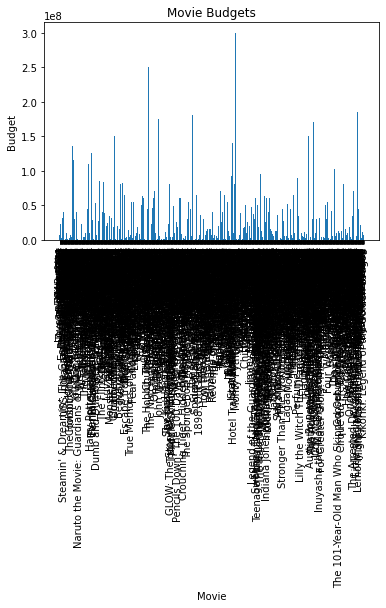

In [39]:
Movie_list = df4.reset_index()
plt.bar(Movie_list["Title"],Movie_list["Budget"])
plt.title("Movie Budgets")
plt.xlabel("Movie")
plt.ylabel("Budget")
plt.xticks(rotation=90)
plt.show()

In [40]:
pprint(Budget_data)

{'adult': False,
 'backdrop_path': '/yizHZ1ynp8INr1O6QNIg5yBLGtW.jpg',
 'belongs_to_collection': None,
 'budget': 0,
 'genres': [{'id': 18, 'name': 'Drama'}, {'id': 35, 'name': 'Comedy'}],
 'homepage': '',
 'id': 436459,
 'imdb_id': 'tt4955566',
 'original_language': 'en',
 'original_title': 'Almost Friends',
 'overview': 'A man in his mid-20s, still living at home with his mother and '
             'stepfather, puts all his eggs in one basket: the girl who works '
             'at his local coffee shop. The problem is, she has a serious '
             'boyfriend. As they become closer, the line between friendship '
             'and intimacy is blurred, and the situation forces both to '
             'examine where they are in their lives.',
 'popularity': 17.561,
 'poster_path': '/uJMknKxZagbhAYiiMjEaFnsZzRR.jpg',
 'production_companies': [{'id': 95157,
                           'logo_path': None,
                           'name': 'Let It Play',
                           'origin_c

In [41]:
df5=df2.loc[(df2["Budget"] !=0) & (df2["Revenue"] !=0) ,:]
df5.head()

,Title,Budget,Movie ID,Revenue
27,City of Joy,27000000,47821,14683921
39,The Spy Next Door,28000000,23172,45236543
45,ATM,3000000,89691,3010
48,One Day,15000000,51828,59389433
50,Shutter Island,80000000,11324,294804195


In [42]:
df6=df5.reset_index()
df6.head()

,index,Title,Budget,Movie ID,Revenue
0,27,City of Joy,27000000,47821,14683921
1,39,The Spy Next Door,28000000,23172,45236543
2,45,ATM,3000000,89691,3010
3,48,One Day,15000000,51828,59389433
4,50,Shutter Island,80000000,11324,294804195


In [ ]:
df6 = df6.set_index("Title")
plt.pie(df6["Revenue"], labels = df6.index, autopct = "%1.2f%%")
plt.title("Movie")
plt.legend(loc="right")
#plt.xticks(rotation=90)
plt.show()